### Credit Risk EDA
Loan companies often face challenges in approving loans for individuals with insufficient or no credit history. This creates a risk for the company, as some borrowers may take advantage of the situation and default on their loans. 

Imagine you work for a consumer finance company specializing in providing various types of loans to urban customers. When the company receives a loan application, it must evaluate the applicant's profile to make an informed decision about loan approval. However, there are two key risks involved:

1. If the applicant is capable of repaying the loan but the company rejects their application, it results in a missed business opportunity.
2. If the applicant is unlikely to repay the loan and the company approves it, it can lead to significant financial losses.

**Business Goal**  
The objective of this analysis is to identify patterns in the data that indicate whether a borrower may struggle to repay their loans. These insights can help the company take informed actions, such as:

- Rejecting loan applications from high-risk applicants.
- Reducing the loan amount for risky applicants.
- Offering loans to such applicants at higher interest rates to mitigate risk.

Through **Exploratory Data Analysis (EDA)**, the goal is to ensure that deserving applicants who can repay loans are not unfairly rejected while minimizing the risk of financial losses caused by defaulters.


### Steps Followed on EDA Process
- **Data Sourcing**  
  Identifying and collecting relevant data for analysis.

- **Data Understanding**  
  Gaining insights into the structure, attributes, and contents of the dataset.

- **Checking Data Quality**  
  Assessing the dataset for inconsistencies, errors, or incomplete information.

- **Treatment of Missing Values**  
  Handling missing data appropriately to maintain the integrity of the analysis.

- **Treatment of Extreme Values**  
  Addressing outliers to prevent skewed results.

- **Treatment of Default Values**  
  Correcting or accounting for default entries in the data.

- **Dropping Unnecessary Columns**  
  Removing irrelevant or redundant columns to streamline the analysis.

- **Data Binning on Numerical Columns**  
  Grouping numerical data into bins for better analysis and interpretation.

- **Data Validation**  
  Ensuring the processed data is accurate and reliable.

- **Imbalanced Data Analysis**  
  Identifying and addressing class imbalances in the dataset.

- **Univariate Analysis**  
  Analyzing individual variables to understand their distributions and patterns.

- **Multivariate Analysis**  
  Exploring relationships between multiple variables.

- **Detecting Correlation**  
  Identifying and analyzing correlations among variables.

- **Data Quality Check in Previous Applications Dataset**  
  Evaluating and improving data quality in the historical application dataset.

- **Merging Datasets**  
  Combining current and previous application datasets for comprehensive analysis.

- **Data Analysis**  
  Performing detailed analysis to extract insights.

- **Inferences, Recommendations & Risk Assessment**  
  Drawing conclusions, making recommendations, and identifying risks based on the analysis.

### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = None
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif')

### Reading the data of application

In [2]:
application_data = pd.read_csv("data/application_data.csv")  

### Checking the information of the data of the application

In [3]:
application_data.info(verbose=True)
print("The Shape of the Application Data: ",application_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Reading the data of previous appplication

In [4]:
prev_application_data = pd.read_csv("data/previous_application.csv")  

### Checking the information of the previous application data 

In [5]:
prev_application_data.info(verbose=True)
print("The Shape of the previous application Data: ",prev_application_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Checking the Null values

In [6]:
# % of Null Values w.r.t to all the columns of Current Application:
(application_data.isnull().mean()).sort_values(ascending=False)

COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
COMMONAREA_MEDI                 0.698723
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
FLOORSMIN_MODE                  0.678486
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_MEDI                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_AVG                    0.593767
LANDAREA_MODE                   0.593767
BASEMENTAREA_MODE               0.585160
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

### Null values insight and further step for Apllication data
 There are several columns with more than 45% missing values in the dataset. These columns contribute little to the analysis and may reduce the overall data quality. Therefore, I will remove all columns with more than 45% null values.

In [7]:
application_data = application_data.loc[:,application_data.isnull().mean()<=0.45]
(application_data.isnull().mean()).sort_values(ascending=False)

OCCUPATION_TYPE                0.313455
EXT_SOURCE_3                   0.198253
AMT_REQ_CREDIT_BUREAU_YEAR     0.135016
AMT_REQ_CREDIT_BUREAU_QRT      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR     0.135016
AMT_REQ_CREDIT_BUREAU_MON      0.135016
AMT_REQ_CREDIT_BUREAU_WEEK     0.135016
AMT_REQ_CREDIT_BUREAU_DAY      0.135016
NAME_TYPE_SUITE                0.004201
DEF_30_CNT_SOCIAL_CIRCLE       0.003320
OBS_30_CNT_SOCIAL_CIRCLE       0.003320
OBS_60_CNT_SOCIAL_CIRCLE       0.003320
DEF_60_CNT_SOCIAL_CIRCLE       0.003320
EXT_SOURCE_2                   0.002146
AMT_GOODS_PRICE                0.000904
AMT_ANNUITY                    0.000039
CNT_FAM_MEMBERS                0.000007
DAYS_LAST_PHONE_CHANGE         0.000003
SK_ID_CURR                     0.000000
CNT_CHILDREN                   0.000000
FLAG_OWN_REALTY                0.000000
FLAG_OWN_CAR                   0.000000
CODE_GENDER                    0.000000
NAME_CONTRACT_TYPE             0.000000
TARGET                         0.000000


### After Removing the data with more that 45% null values
After handling columns with over 45% missing values, the column with the highest proportion of missing values now has around 31%. As the next step, let’s visualize the distribution of the "Occupation Type" column to better understand its data.

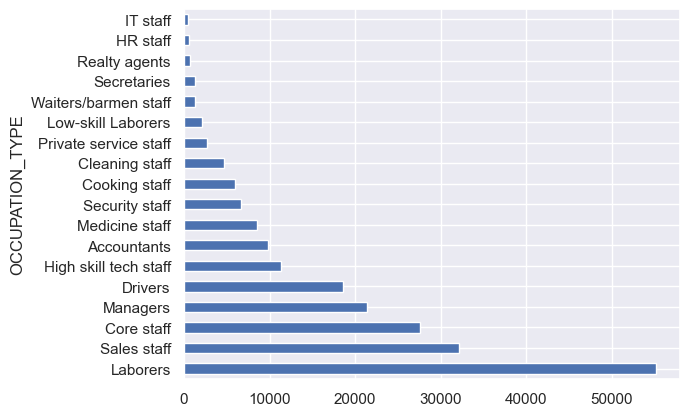

In [8]:
application_data.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()


1. The "Occupation Type" field contains over 31% missing values. Filling these missing values with the most frequent value could introduce bias by over-representing a specific occupation type, which may affect the integrity of the analysis.

2. To address this, I will use forward fill to handle the missing values. This approach ensures a more balanced and unbiased filling of the missing records, preserving the natural flow and distribution of the data.

In [9]:
application_data['OCCUPATION_TYPE'].fillna(method='ffill',inplace=True)

The `EXT_SOURCE_3` field represents a score collected from an external source and has approximately 20% missing values. To better understand its relationship with the target variable, we will plot a boxplot.

This visualization will help us analyze the distribution of `EXT_SOURCE_3` across different values of the target variable, providing insights into how this feature correlates with the target outcome.

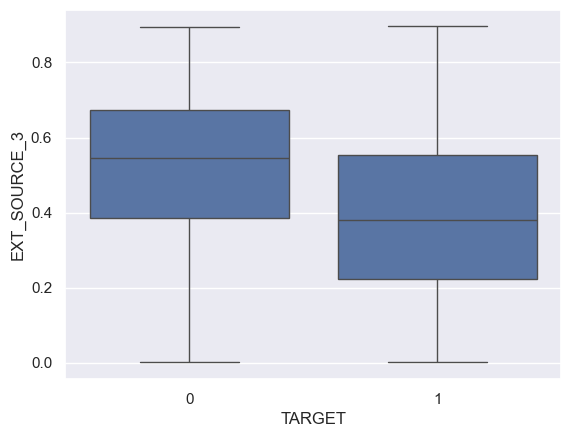

In [10]:
sns.boxplot(x=application_data['TARGET'] , y= application_data['EXT_SOURCE_3'])
plt.show()

1. The boxplot reveals that the median value of `EXT_SOURCE_3` for positive target values is 0.4, while for negative target values, it is 0.55. This difference highlights a variation in the distribution of the feature based on the target variable, which is an important insight for further analysis.

2. To ensure that the imputation of missing values is not biased towards either class of the target variable, we need to choose a method that maintains balance and fairness. A biased imputation method could potentially distort the relationship between this feature and the target variable, leading to inaccurate predictions.

3. To address this, I will use mean imputation to fill the missing values in `EXT_SOURCE_3`. This approach provides a neutral way to handle missing data by leveraging the average of the available values, ensuring that the imputed values do not disproportionately favor either target class.

In [11]:
application_data['EXT_SOURCE_3'] =application_data['EXT_SOURCE_3'].fillna(value=application_data['EXT_SOURCE_3'].mean())
# /application_data['EXT_SOURCE_2'] =application_data['EXT_SOURCE_2'].fillna(value=application_data['EXT_SOURCE_2'].mean())

Columns AMT_REQ_CREDIT_BUREAU** has 13% of missing value. Let us plot and see the distribution

[]

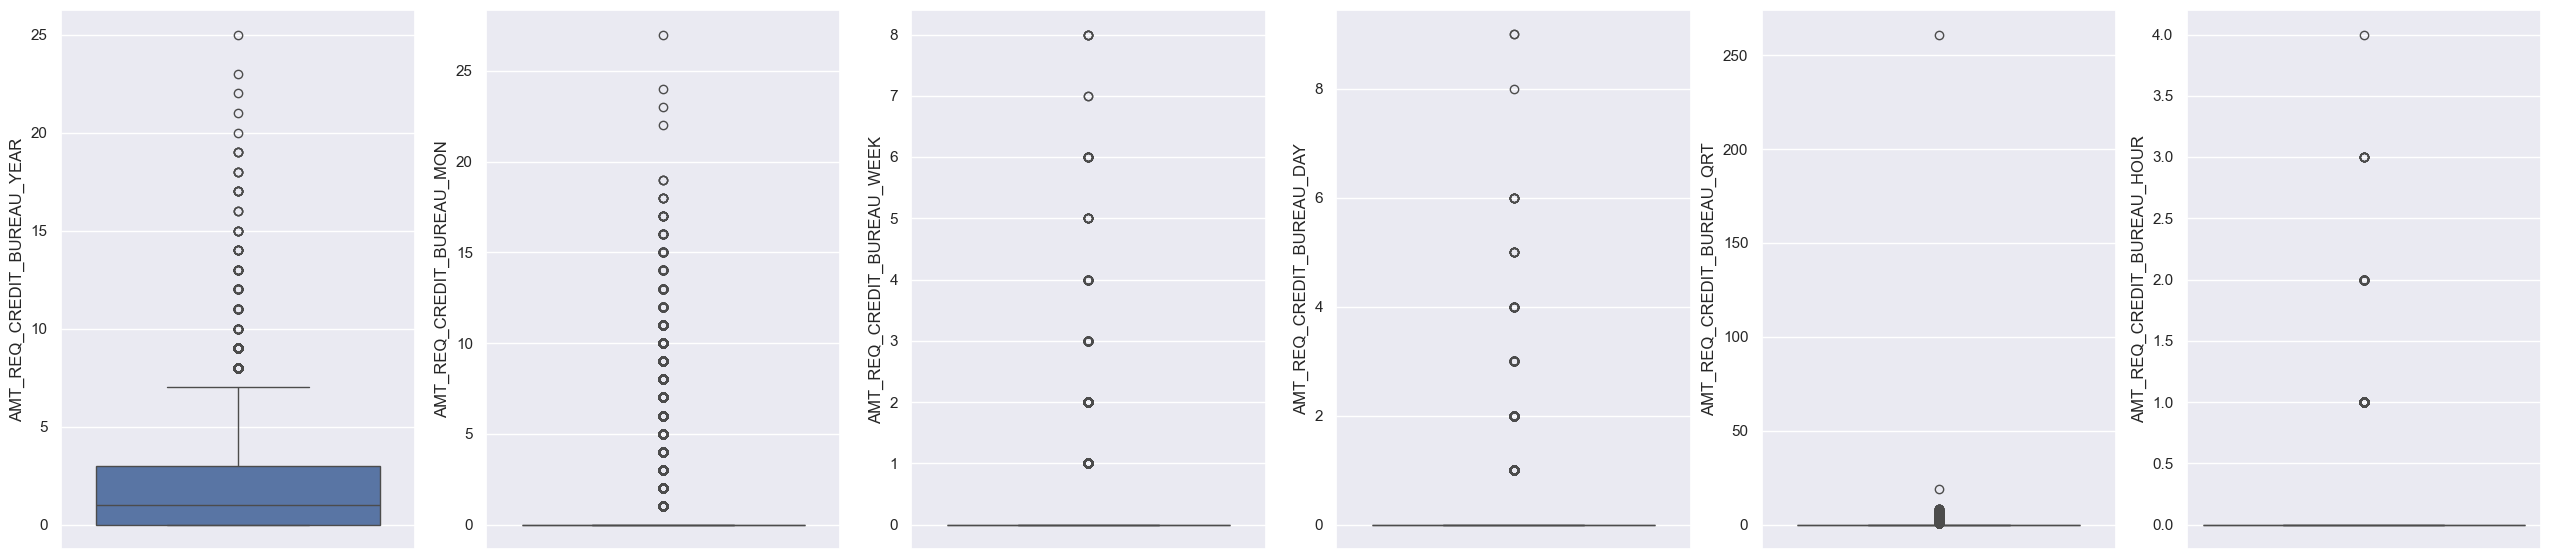

In [12]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6)=plt.subplots(ncols=6,figsize=(32,7))
sns.boxplot((application_data.AMT_REQ_CREDIT_BUREAU_YEAR),ax=ax1)
sns.boxplot((application_data.AMT_REQ_CREDIT_BUREAU_MON),ax=ax2)
sns.boxplot((application_data.AMT_REQ_CREDIT_BUREAU_WEEK),ax=ax3)
sns.boxplot((application_data.AMT_REQ_CREDIT_BUREAU_DAY),ax=ax4)
sns.boxplot((application_data.AMT_REQ_CREDIT_BUREAU_QRT),ax=ax5)
sns.boxplot((application_data.AMT_REQ_CREDIT_BUREAU_HOUR),ax=ax6)
plt.plot()

In [13]:
## extarct count of missing values in AMT_REQ_CREDIT_BUREAU***** Columns
missing_value_AMT_REQ=[application_data[col].isnull().sum() for col in application_data if col.startswith('AMT_REQ_CREDIT_BUREAU') ]
missing_value_AMT_REQ

[np.int64(41519),
 np.int64(41519),
 np.int64(41519),
 np.int64(41519),
 np.int64(41519),
 np.int64(41519)]

The `AMT_REQ_CREDITBUREAU` columns appear to contain outliers with extreme values. To handle the missing values effectively and minimize the impact of these outliers, we can proceed with imputation using the median.

In [14]:
def impute_missing(col):
    application_data[col]=application_data[col].fillna(value=application_data[col].median())
    return application_data[col].isnull().sum()

In [15]:
# by calling fuction impute_missing we can get rid of missing values in specified columns
impute_missing('AMT_REQ_CREDIT_BUREAU_YEAR')
impute_missing('AMT_REQ_CREDIT_BUREAU_MON')
impute_missing('AMT_REQ_CREDIT_BUREAU_WEEK')
impute_missing('AMT_REQ_CREDIT_BUREAU_DAY')
impute_missing('AMT_REQ_CREDIT_BUREAU_HOUR')
impute_missing('AMT_REQ_CREDIT_BUREAU_QRT')

np.int64(0)

[]

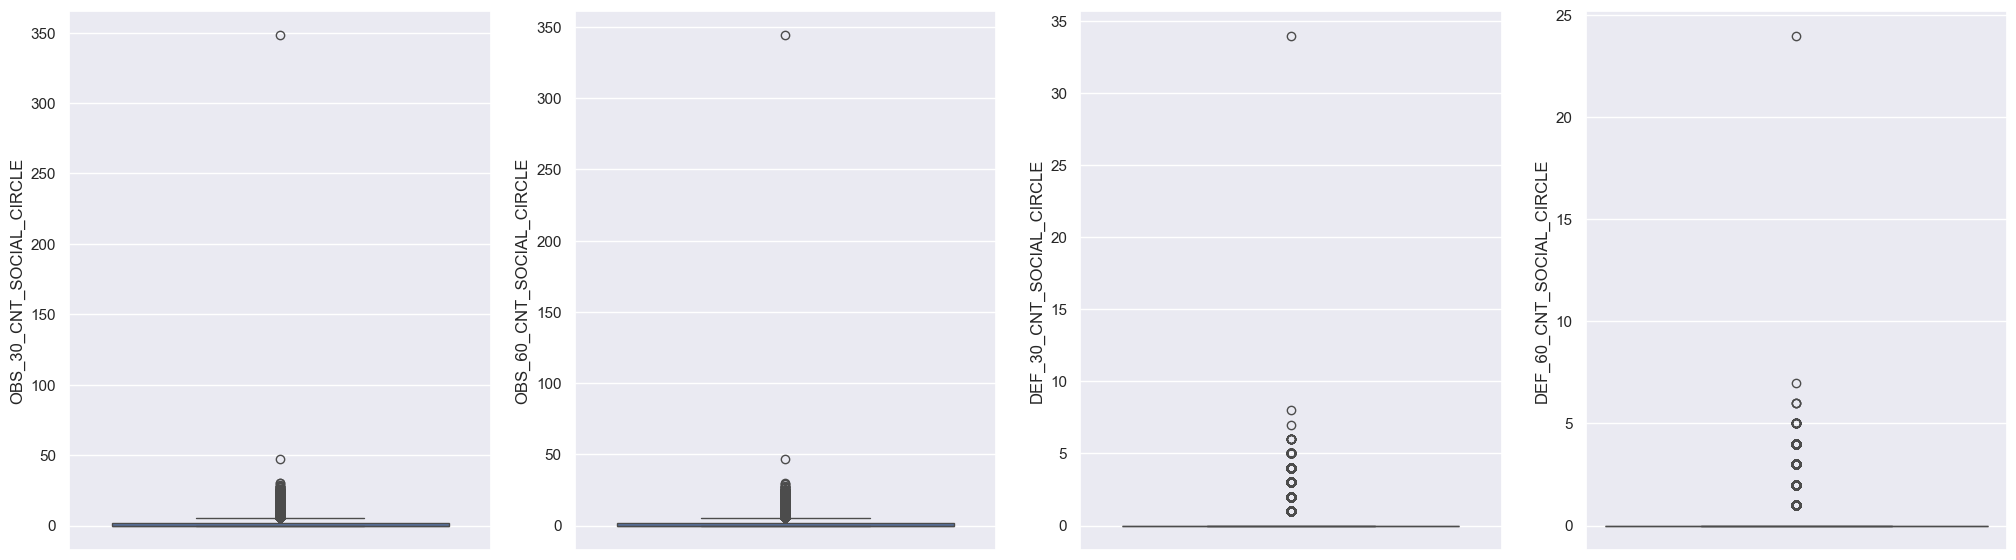

In [16]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,figsize=(25,7))
sns.boxplot((application_data.OBS_30_CNT_SOCIAL_CIRCLE),ax=ax1)
sns.boxplot((application_data.OBS_60_CNT_SOCIAL_CIRCLE),ax=ax2)
sns.boxplot((application_data.DEF_30_CNT_SOCIAL_CIRCLE),ax=ax3)
sns.boxplot((application_data.DEF_60_CNT_SOCIAL_CIRCLE),ax=ax4)
plt.plot()

All the columns related to `CNT_SOCIAL_CIRCLE` contain both missing values and outliers. To ensure the dataset is clean and consistent, we will proceed to remove these columns from the analysis. This will help avoid any potential distortion in the results caused by the missing or extreme values in these fields.

In [17]:
# Treating Extreme Value with median Value:
application_data["OBS_60_CNT_SOCIAL_CIRCLE"] = np.where(application_data["OBS_60_CNT_SOCIAL_CIRCLE"] > 50, float(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median()), application_data["OBS_60_CNT_SOCIAL_CIRCLE"])
application_data["OBS_30_CNT_SOCIAL_CIRCLE"] = np.where(application_data["OBS_30_CNT_SOCIAL_CIRCLE"] > 50, float(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median()), application_data["OBS_30_CNT_SOCIAL_CIRCLE"])

# Trating missing Values with Median Value:
impute_missing('OBS_60_CNT_SOCIAL_CIRCLE')
impute_missing('OBS_30_CNT_SOCIAL_CIRCLE')
impute_missing('DEF_30_CNT_SOCIAL_CIRCLE')
impute_missing('DEF_60_CNT_SOCIAL_CIRCLE')


np.int64(0)

['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']


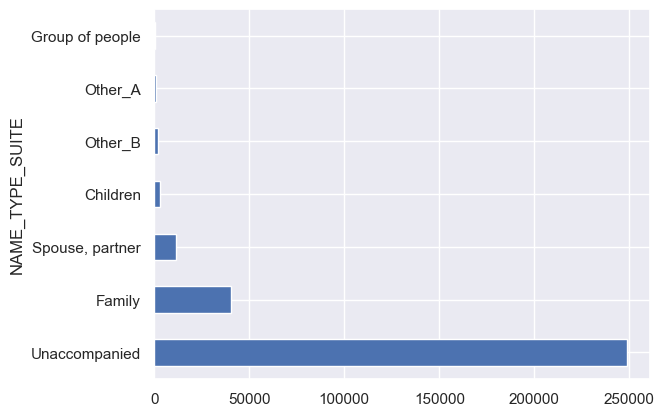

In [18]:
print(application_data['NAME_TYPE_SUITE'].unique())
application_data['NAME_TYPE_SUITE'].value_counts().plot.barh()
plt.show()

The `NAME_TYPE_SUITE` column indicates who was accompanying the client. If a client has not provided information for this column, it can be assumed that they visited unaccompanied.

Therefore, we can proceed with mode imputation to fill the missing values, as the most frequent category is likely to represent unaccompanied clients. This approach ensures logical and consistent handling of missing values.

In [19]:
application_data.NAME_TYPE_SUITE.fillna(application_data.NAME_TYPE_SUITE.mode()[0],inplace=True)

1. The missing records in `AMT_GOODS_PRICE`, `AMT_ANNUITY`, and `CNT_FAM_MEMBERS` are less than 1%, which is a very small proportion of the dataset.

2. Since `AMT_GOODS_PRICE` and `AMT_ANNUITY` are critical features in loan applications, their missing values can be considered as **Missing Not At Random (MNAR)**. As these records are unlikely to be imputed accurately, we can safely drop the rows with missing values to maintain the quality of the analysis.

In [20]:
application_data.dropna(axis=0,inplace=True)

In [21]:
for col in application_data.columns:
  k= application_data[col].unique()
  print(col, k)

SK_ID_CURR [100002 100003 100004 ... 456253 456254 456255]
TARGET [1 0]
NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['M' 'F' 'XNA']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
CNT_CHILDREN [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS ['Single / not married' 'Married' 'Civil 

From the observations above, it is evident that all columns starting with `DAYS` contain negative values, likely representing durations or dates relative to a reference point. These values may need to be transformed or interpreted accordingly for meaningful analysis.

Additionally, the `GENDER` and `ORGANIZATION_TYPE` columns contain "XNA" as a value, which appears to be an invalid or placeholder entry. These entries need to be treated appropriately, either by replacing them with a suitable value or removing the affected rows to ensure data accuracy.

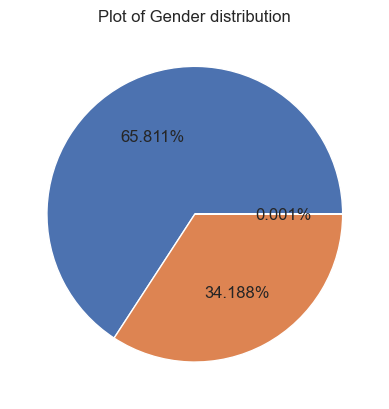

CODE_GENDER
F      201750
M      104808
XNA         4
Name: count, dtype: int64


In [22]:
plt.pie(application_data['CODE_GENDER'].value_counts(normalize=True)*100,autopct='%1.3f%%')
plt.title("Plot of Gender distribution")
plt.show()
print(application_data['CODE_GENDER'].value_counts())


Since only four records in the `GENDER` column have the value "XNA" (representing "Missing"), the impact on the dataset is minimal. Therefore, we can either drop these records to maintain data consistency or impute them with a suitable value if the context allows. Dropping these records seems like a simpler and more reliable approach in this case.

In [23]:
application_data.drop(application_data[application_data['CODE_GENDER']=='XNA'].index,inplace=True)

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


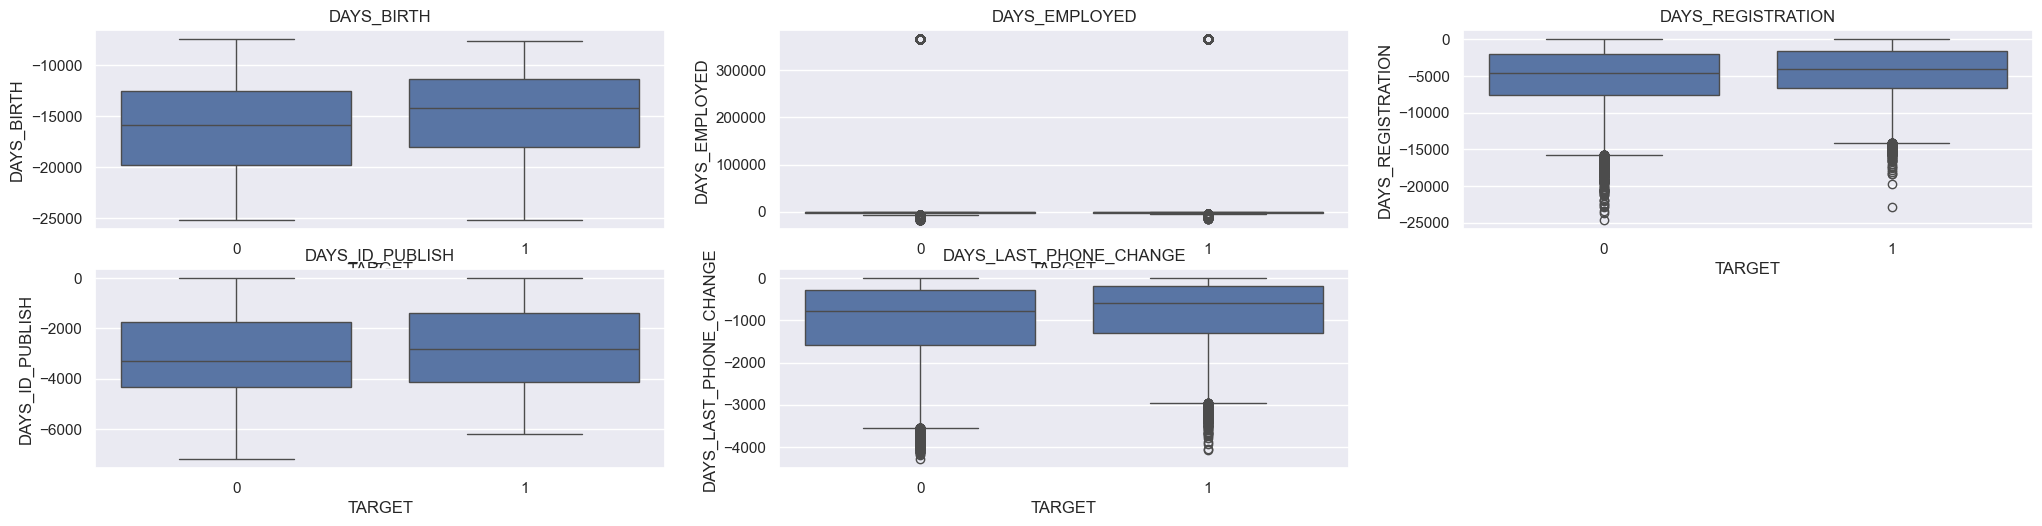

In [24]:
# Lets extract list of all the days col and having negative values
temp_list=[]
plotnum=1
plt.figure(figsize=(25,15), facecolor='white')
for col in application_data.columns:
  if col.startswith('DAYS'):
    ax=plt.subplot(5,3,plotnum)
    sns.boxplot(x=application_data['TARGET'],y=application_data[col])
    plt.title(col)
    plt.plot()
    temp_list.append(col)
    plotnum+=1
print(temp_list)

All columns starting with `DAYS`, except for `DAYS_EMPLOYED`, have negative values, which likely represent durations or dates relative to a reference point (e.g., days before an event). To simplify interpretation and analysis, we can convert these negative values to positive ones while maintaining their relative meaning. This transformation will make the data easier to understand and work with.

In [25]:
# we have list of columns staring with Days stored in temp_list we can convert it to absolute value
application_data[temp_list] = abs(application_data[temp_list])

The `DAYS_EMPLOYED` column appears to contain outlier values, which may significantly deviate from the typical range of employment durations. To better understand these anomalies, we can analyze the column in detail, such as plotting its distribution or calculating statistical metrics (e.g., mean, median, and standard deviation). This will help us identify and address the outliers appropriately.

In [26]:
application_data[temp_list].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  306558.000000  306558.000000      306558.000000    306558.000000   
mean    16037.710048   67718.805675        4985.117550      2994.475046   
std      4363.268432  139438.235164        3522.376487      1509.411676   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12414.000000     933.000000        2009.000000      1720.000000   
50%     15751.000000    2220.000000        4503.000000      3255.000000   
75%     19681.000000    5707.000000        7477.750000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           306558.000000  
mean               963.175220  
std                826.988602  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

### Treating the default values 

In [27]:
print(application_data['DAYS_EMPLOYED'].quantile([0,0.1,0.3,0.6,0.8,0.9,0.95,1]))


0.00         0.0
0.10       392.0
0.30      1132.0
0.60      3033.0
0.80      9186.6
0.90    365243.0
0.95    365243.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64


To understand the anomalies in the `DAYS_EMPLOYED` column, let’s analyze the distribution of the `Occupation Type` column for rows where `DAYS_EMPLOYED` is filled with the default value of **365243**. This will help us identify patterns or relationships between the default value and specific occupation types, providing insights into why this default value may have been assigned.

(55197, 73)

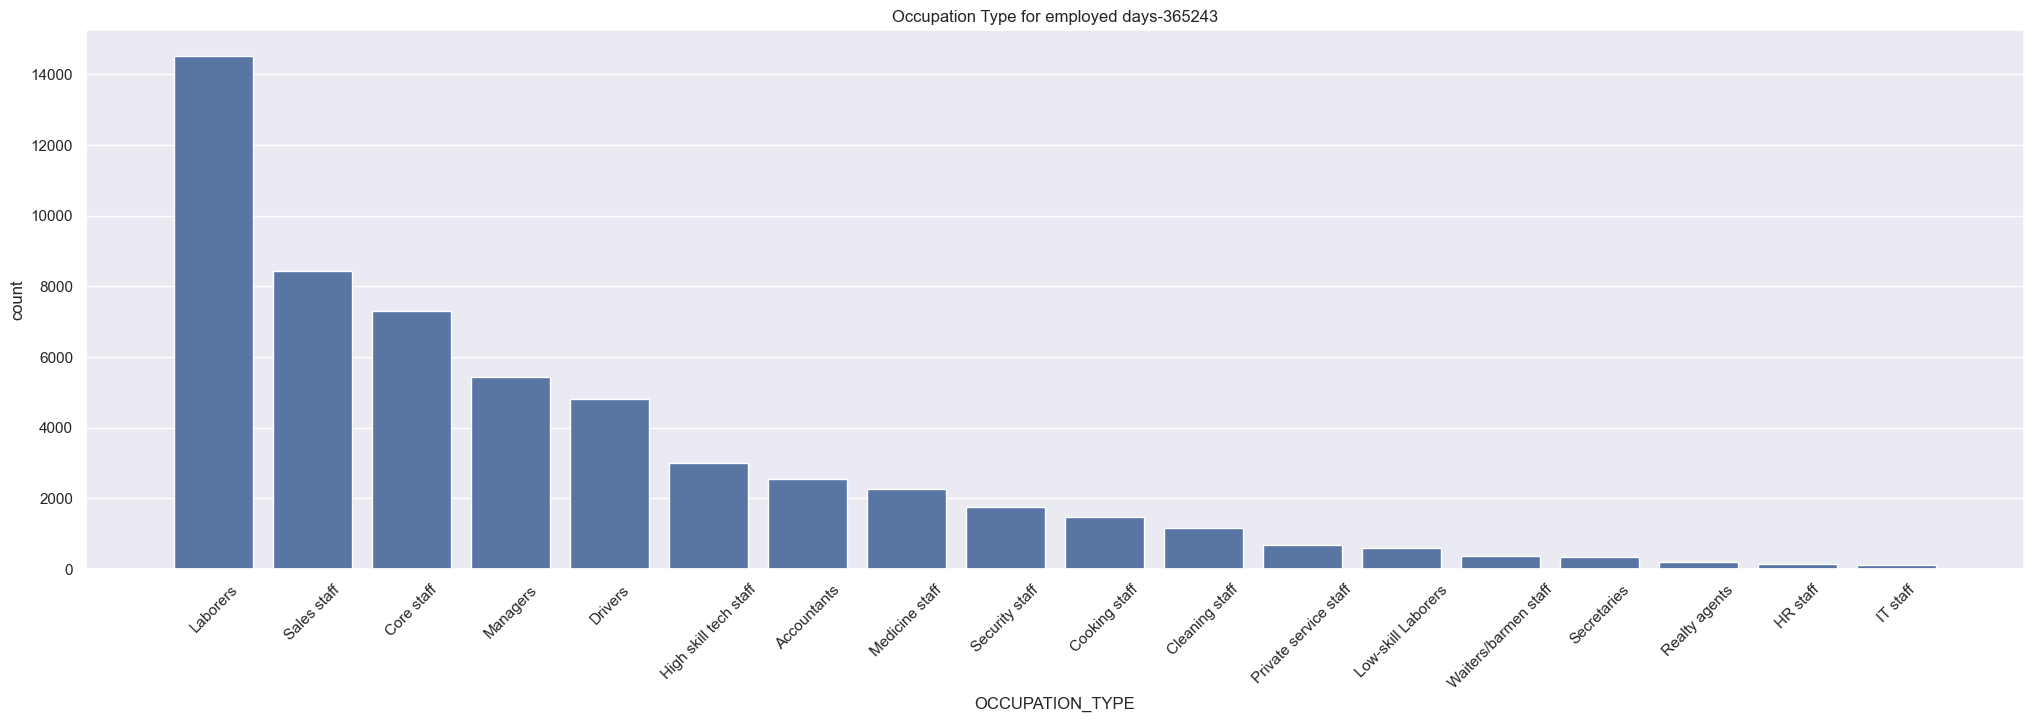

In [28]:
df1 = (application_data[application_data['DAYS_EMPLOYED']==365243.0]).copy()

plt.figure(figsize=(25,7))
sns.barplot(x=df1['OCCUPATION_TYPE'].value_counts().index,y=df1['OCCUPATION_TYPE'].value_counts())
plt.xticks(rotation=45)
plt.title("Occupation Type for employed days-365243")
plt.plot()
df1.shape

In [29]:
df1['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
XNA    55197
Name: count, dtype: int64

1. The `DAYS_EMPLOYED` column contains around 55k records with a value of **365243**, which translates to approximately 1,000 years. This clearly indicates that a default value has been used instead of leaving these entries blank or missing. Such default values need to be carefully handled during preprocessing to ensure the accuracy of the analysis.

2. Similarly, the `ORGANIZATION_TYPE` column has the second most frequent value as `'XNA'`, which appears to be a placeholder or invalid entry. These values need to be treated appropriately, either through imputation or by removing the affected records, to maintain data quality.

[]

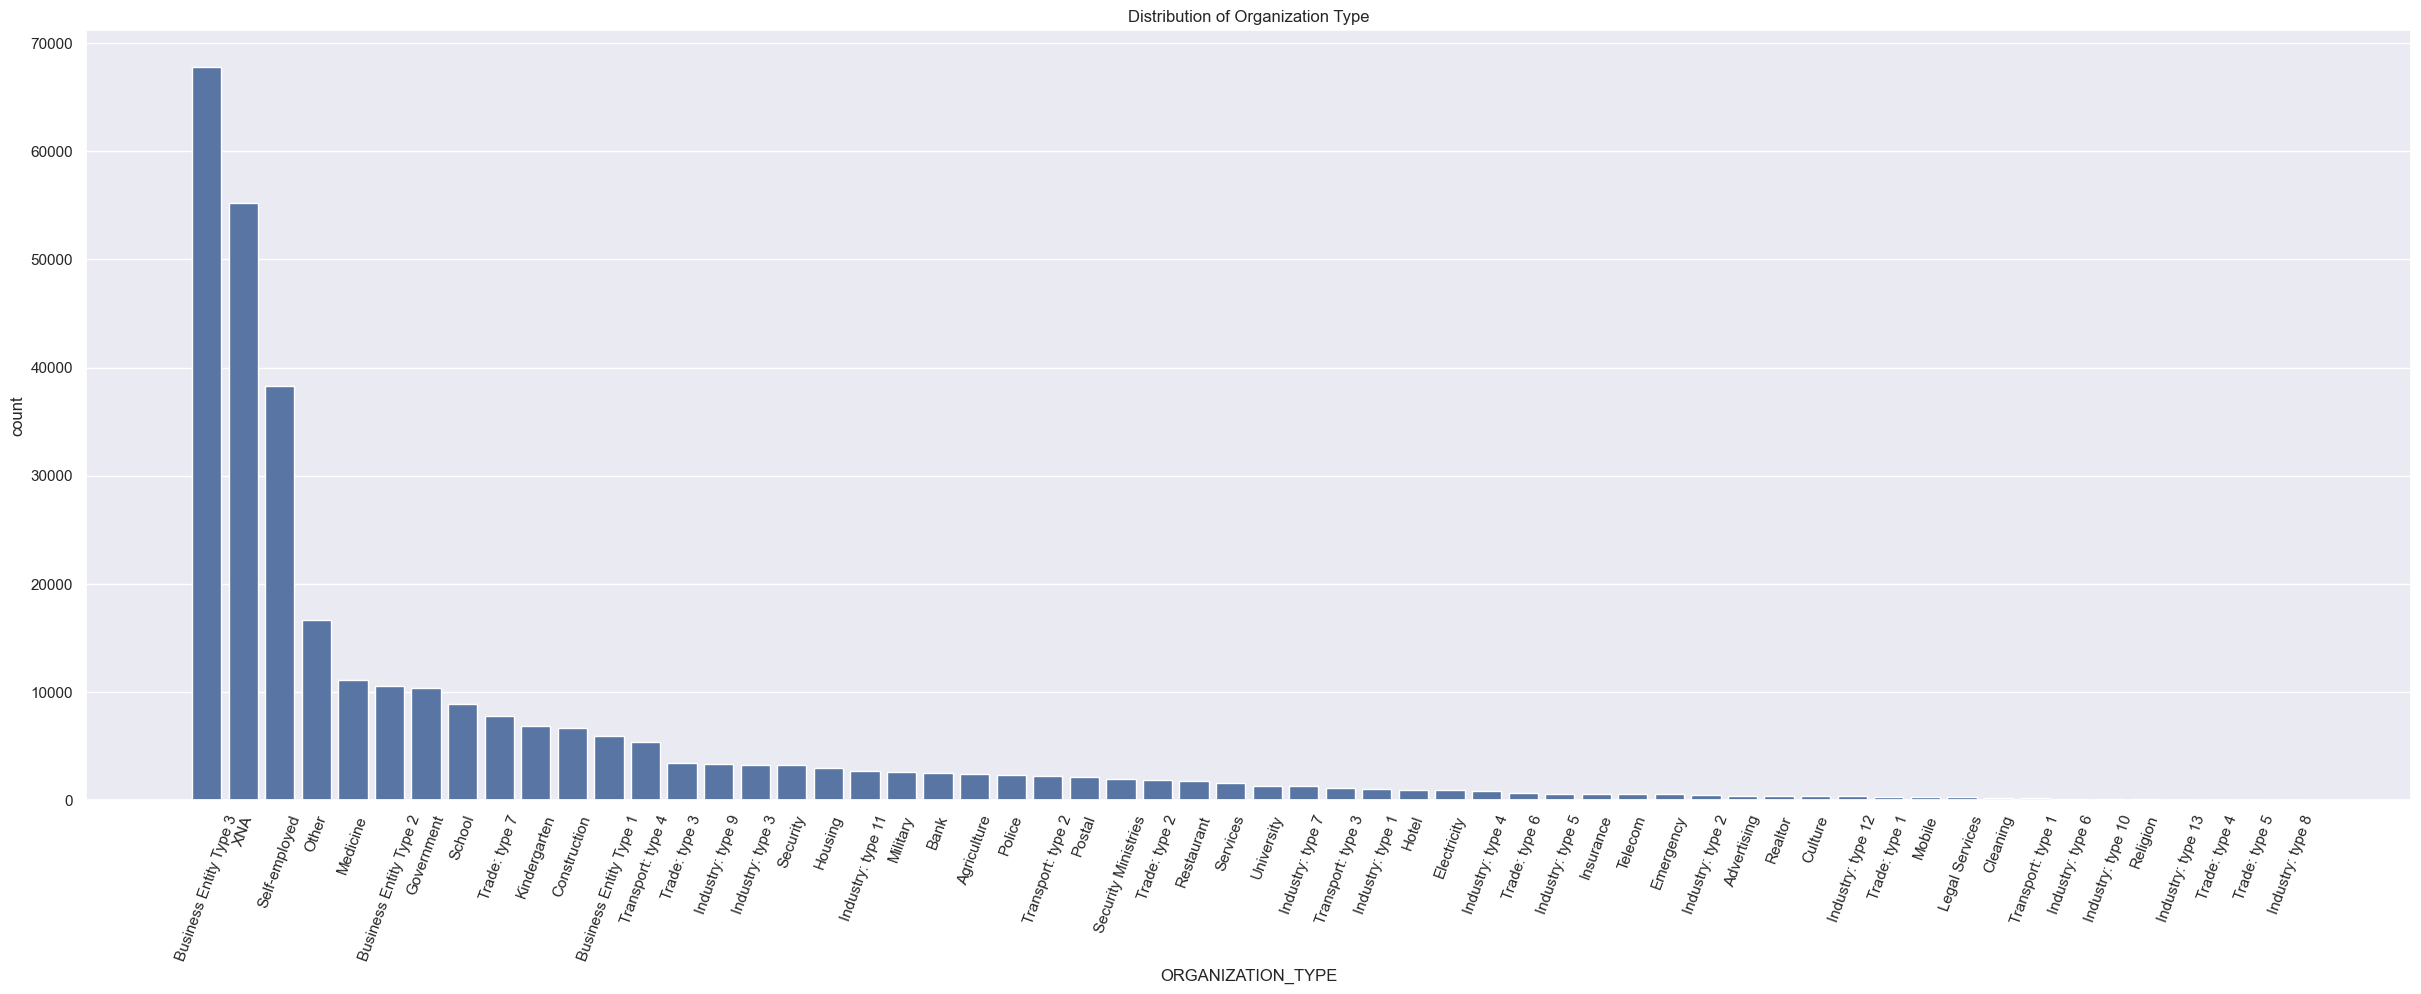

In [30]:
plt.figure(figsize=(30,10))
sns.barplot(x=application_data['ORGANIZATION_TYPE'].value_counts().index,y=application_data['ORGANIZATION_TYPE'].value_counts())
plt.xticks(rotation=70)
plt.title("Distribution of Organization Type")
plt.plot()

To analyze the distribution of `ORGANIZATION_TYPE` among defaulters, we will plot the `ORGANIZATION_TYPE` column from the subset of the DataFrame containing only defaulter records. This visualization will help us understand which organization types are more commonly associated with loan defaults and provide insights into potential risk factors.

[]

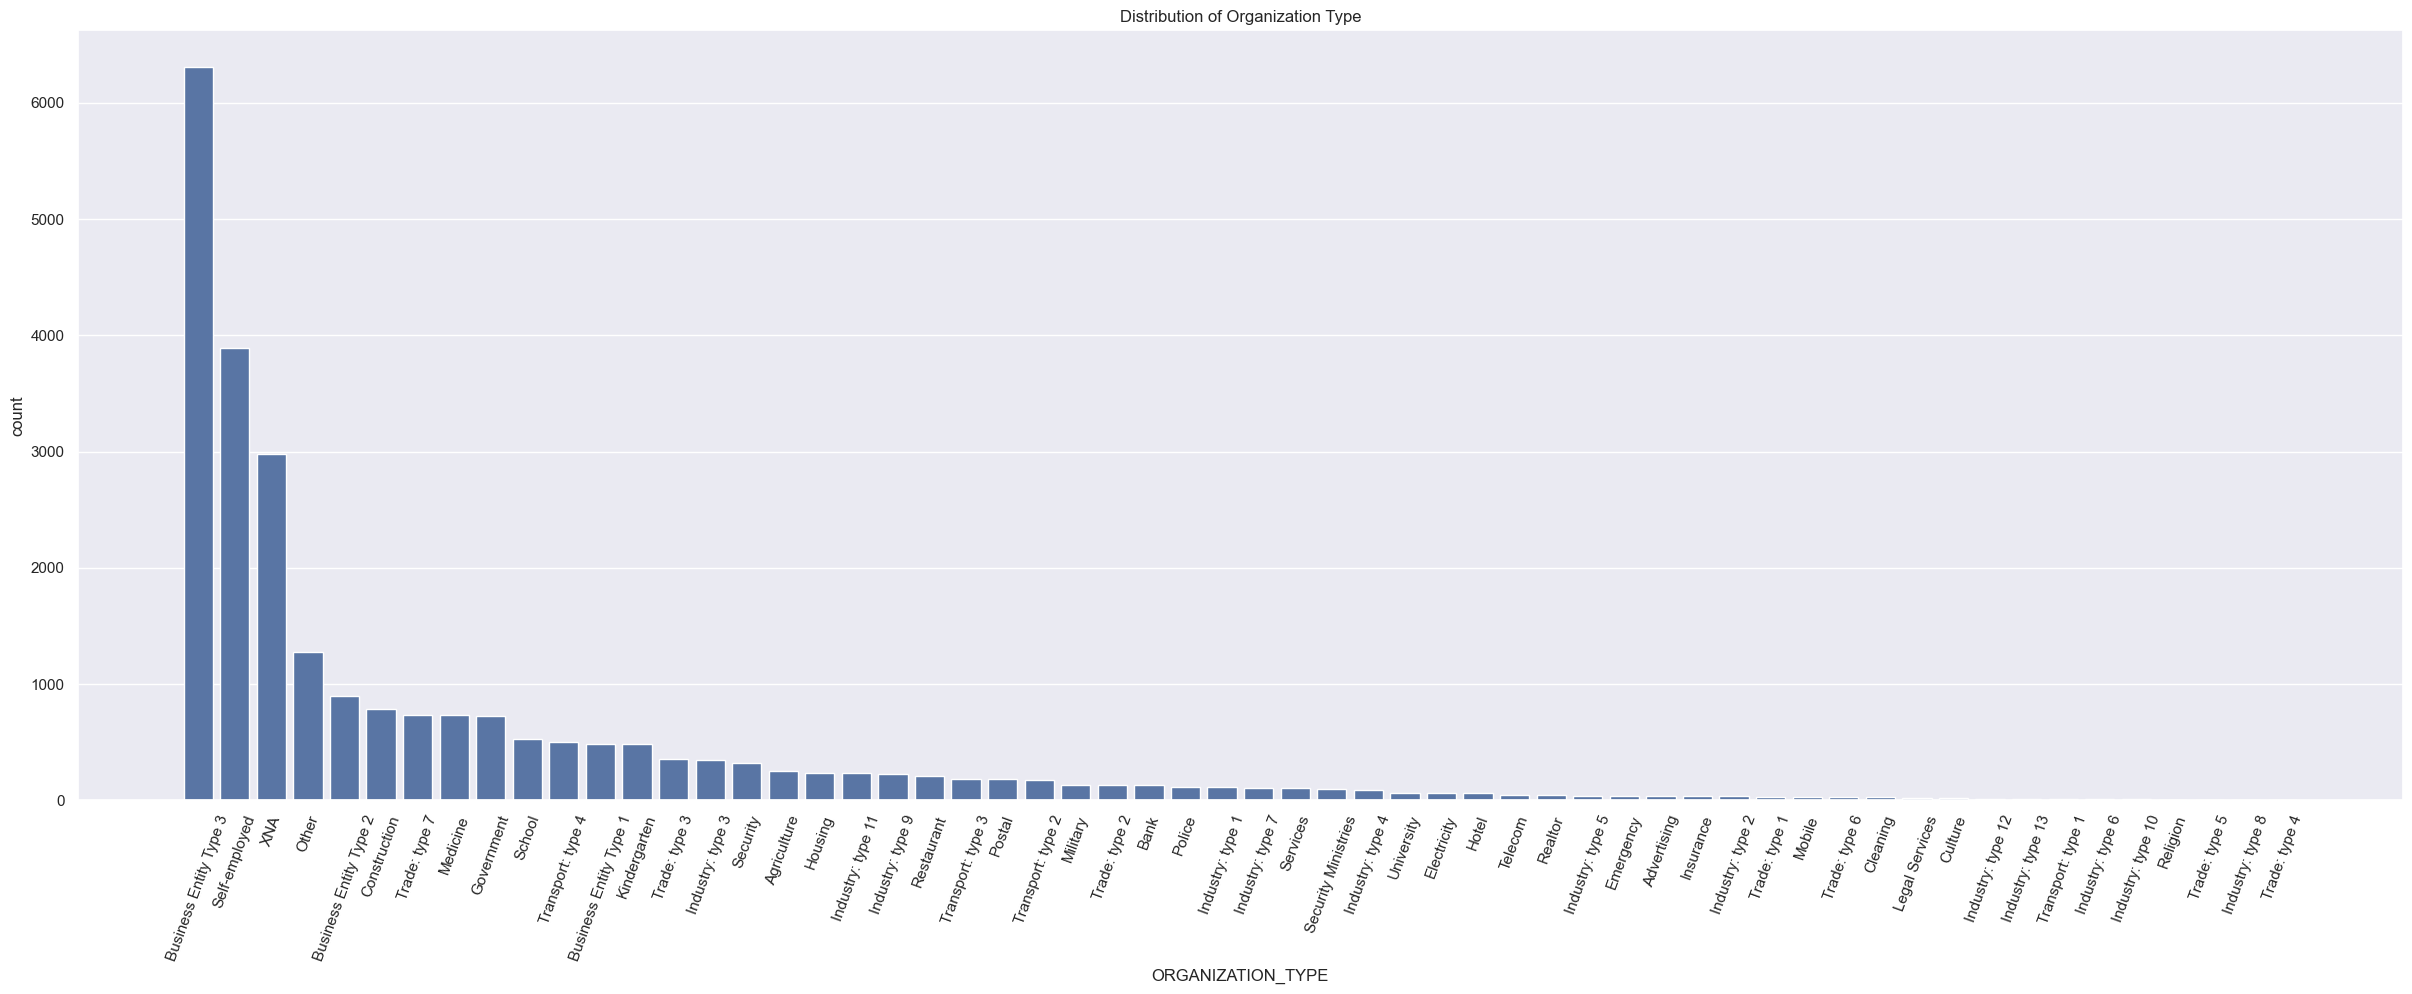

In [31]:
df0 =application_data[application_data['TARGET']==1]
plt.figure(figsize=(30,10))
sns.barplot(x=df0['ORGANIZATION_TYPE'].value_counts().index,y=df0['ORGANIZATION_TYPE'].value_counts())
plt.xticks(rotation=70)
plt.title("Distribution of Organization Type")
plt.plot()

It is now evident that applicants with missing `ORGANIZATION_TYPE` values have also set their `DAYS_EMPLOYED` to a default value of 365243 (approximately 1000 years). This suggests a correlation between the missing values in these two columns. It is likely that these applicants chose not to disclose their employment details, including both their organization type and employment duration.

To handle this, we can impute the missing `DAYS_EMPLOYED` values with **0** and replace the missing `ORGANIZATION_TYPE` entries with **'Unknown'**. This approach ensures logical consistency while preserving the data for further analysis.

In [32]:
application_data.ORGANIZATION_TYPE.replace(to_replace='XNA',value='Unknown',inplace=True)
application_data.DAYS_EMPLOYED.replace(to_replace=365243.0,value=0,inplace=True)

### Treating the Categorical value 

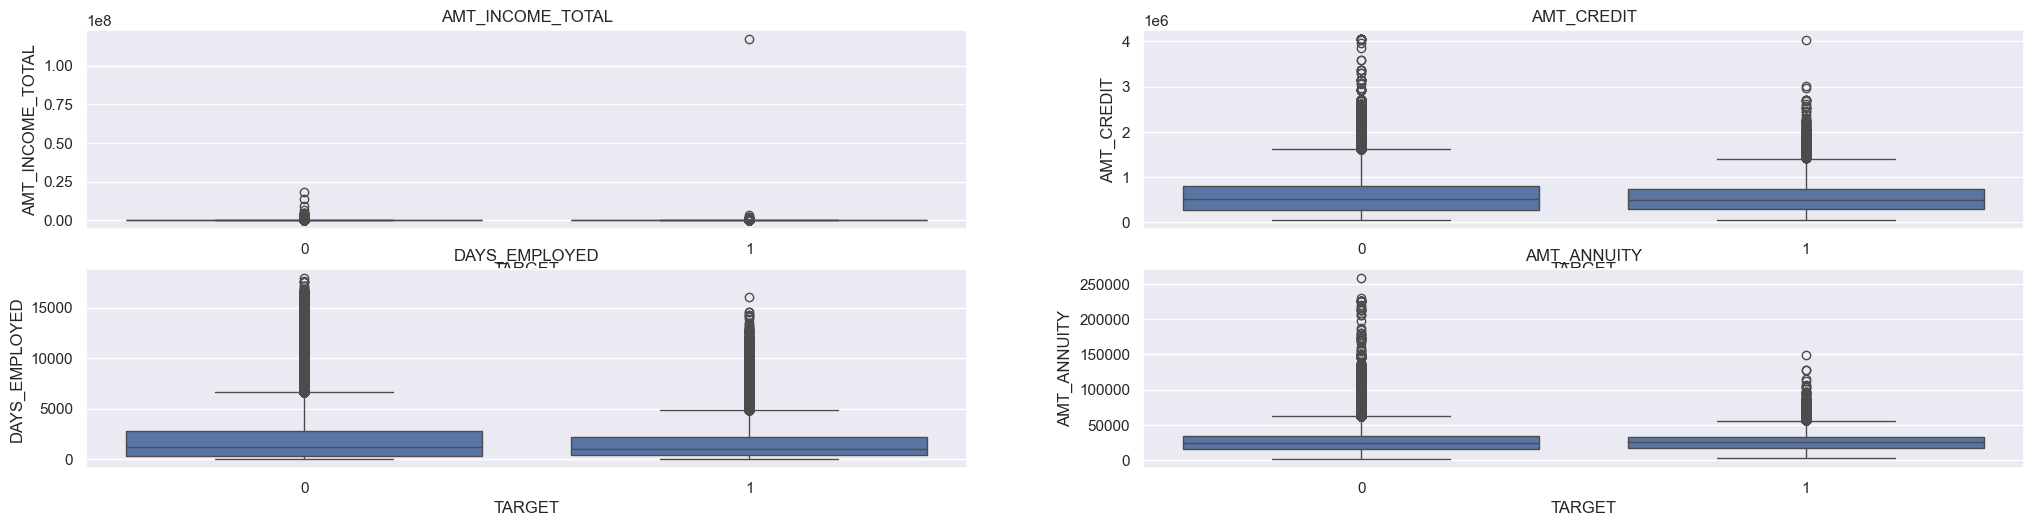

In [33]:
application_data_columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_EMPLOYED','AMT_ANNUITY']
plotnum=1
plt.figure(figsize=(25,15), facecolor='white')
for col in application_data_columns:
  ax=plt.subplot(5,2,plotnum)
  sns.boxplot(x=application_data['TARGET'],y=application_data[col])
  plt.title(col)
  plt.plot()
  plotnum+=1

It is evident that several columns in the dataset contain outlier values that may distort the analysis if left unaddressed. These outliers need to be handled carefully to ensure data accuracy.

For some of the numerical columns, we can transform them into categorical columns by creating bins. This binning process will group the continuous values into distinct ranges or categories, making it easier to analyze patterns and relationships in the data during further analysis.

In [34]:
# Creating bins for income amount
bins = [0,1,2,3,4,5,6,7,8,9,10,15]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']
application_data['AMT_INCOME_TOTAL']=application_data['AMT_INCOME_TOTAL']/100000
application_data['AMT_INCOME_RANGE']= pd.cut(application_data['AMT_INCOME_TOTAL'], bins,labels=slot)
application_data['AMT_INCOME_RANGE'].value_counts(normalize = True)*100
application_data['AMT_INCOME_TOTAL']=application_data['AMT_INCOME_TOTAL']*100000
application_data['AMT_INCOME_RANGE'].value_counts(normalize = True)*100

AMT_INCOME_RANGE
100K-200K    50.712295
200k-300k    21.222681
0-100K       20.684626
300k-400k     4.782461
400k-500k     1.745988
500k-600k     0.355332
600k-700k     0.283548
800k-900k     0.097235
1M Above      0.054164
700k-800k     0.052533
900k-1M       0.009136
Name: proportion, dtype: float64

### Insights

The income distribution shows that approximately 50% of applicants fall within the total income range of **100-200K**, making it the most common range. This is followed by the **200-300K** range with 21% and the **0-100K** range with 20% of applicants.

This indicates that individuals with a lower income range (0 to 200K) are the most frequent loan applicants. This trend suggests a higher demand for financial assistance among people in the lower income brackets.

In [35]:
# Creating bins for Credit amount
bins = [0,1,2,3,4,5,6,7,8,9,10,15]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']
application_data['AMT_CREDIT']=application_data['AMT_CREDIT']/100000
application_data['AMT_CREDIT_RANGE']= pd.cut(application_data['AMT_CREDIT'], bins,labels=slot)
application_data['AMT_CREDIT_RANGE'].value_counts(normalize = True)*100
application_data['AMT_CREDIT']=application_data['AMT_CREDIT']*100000
application_data['AMT_CREDIT_RANGE'].value_counts(normalize = True)*100

AMT_CREDIT_RANGE
200k-300k    18.437511
1M Above     13.248369
500k-600k    11.545925
400k-500k    10.794429
100K-200K    10.120686
300k-400k     8.876982
600k-700k     8.110273
800k-900k     7.353031
700k-800k     6.476793
900k-1M       3.012069
0-100K        2.023934
Name: proportion, dtype: float64

The `AMT_CREDIT_RANGE` data reveals that approximately **18%** of applicants fall within the credit amount range of **200-300K**, indicating a significant portion in this category. 

Additionally, around **13%** of applicants have a credit amount exceeding **1M**, representing a smaller yet notable group of high-credit borrowers. These insights provide valuable information about the credit distribution across different applicant segments.

In [36]:
#Creating bins for Employement Time
application_data['YEARS_EMPLOYED'] = application_data['DAYS_EMPLOYED']//365
bins = [-1,5,10,20,30,40,50,100]
slots = ['0-5Y','5-10Y','10-20Y','20-30Y','30-40Y','40-50Y','50 above']
application_data['EMPLOYMENT_YEAR']=pd.cut(application_data['YEARS_EMPLOYED'],bins=bins,labels=slots)
application_data['EMPLOYMENT_YEAR'].value_counts(normalize = True)*100

EMPLOYMENT_YEAR
0-5Y        67.600585
5-10Y       18.210910
10-20Y      10.623438
20-30Y       2.735535
30-40Y       0.772774
40-50Y       0.056759
50 above     0.000000
Name: proportion, dtype: float64

The `EMPLOYMENT_YEAR` data shows that approximately **67%** of applicants have an employment duration of **0-5 years**. This indicates that the majority of loan applicants are either newly employed or have relatively short employment histories. Understanding this trend can help in assessing applicant risk profiles and designing suitable loan products.

In [37]:
#Creating bins for amt_annuity
bins = [0,5000,10000,20000,30000,40000,50000,300000]
slot = ['Very Low','Low', 'Average','Above Average','High','Extremely High']
application_data['AMT_ANNUITY_RANGE']=pd.cut(application_data['AMT_ANNUITY'],bins=bins,labels=slots)
application_data['AMT_ANNUITY_RANGE'].value_counts(normalize = True)*100

AMT_ANNUITY_RANGE
20-30Y      30.083704
10-20Y      27.023924
30-40Y      19.071758
40-50Y       9.341462
5-10Y        7.169606
50 above     6.938328
0-5Y         0.371218
Name: proportion, dtype: float64

The `AMT_ANNUITY_RANGE` data reveals that approximately **30%** of applicants fall within the annuity range of **20-30 years**, making it the most common category. In contrast, less than **0.5%** of applicants have an annuity range of **0-5 years**, which is notably low.

This indicates a preference for longer annuity periods among the majority of applicants, while shorter annuity terms are comparatively rare. This trend can provide insights into applicant preferences and repayment capacity.

In [38]:
#Conversion of Object and Numerical columns to Categorical Columns
cat_col = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY']
for col in cat_col:
    application_data[col] =pd.Categorical(application_data[col])

To enhance our analysis, we can create a new variable that represents the ratio of each applicant's income to their credit amount. This variable will provide insights into the proportion of credit relative to income, which can be a valuable indicator for understanding an applicant's repayment capacity and financial stability.

In [39]:
# creating a column ratio of Amount Credit and Total Income
application_data['CREDIT_INCOME_RATIO']=round((application_data['AMT_CREDIT']/application_data['AMT_INCOME_TOTAL']))

[]

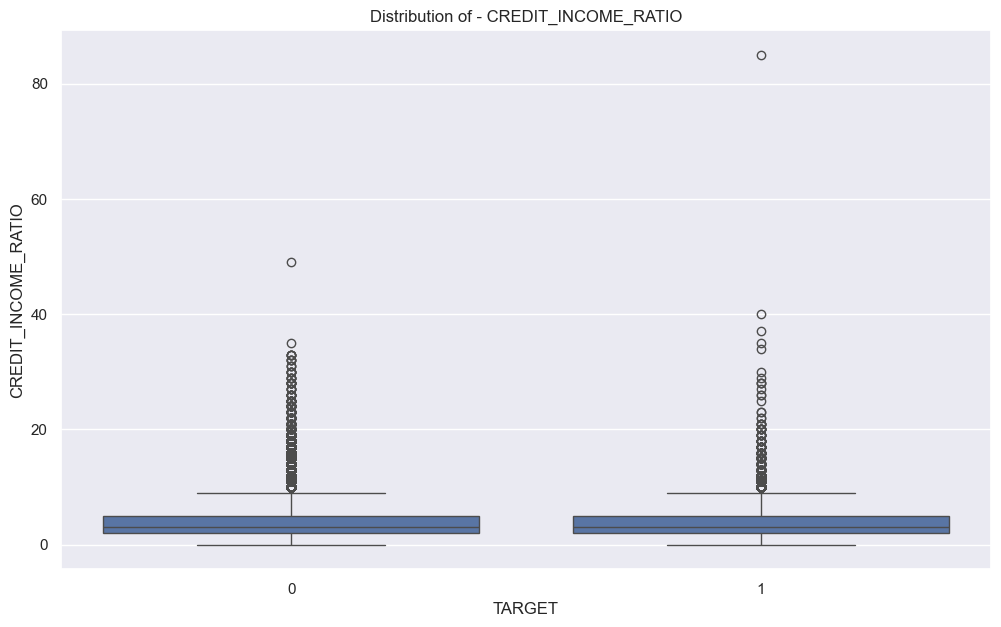

In [40]:
plt.figure(figsize=(12,7))
sns.boxplot(x=application_data['TARGET'],y=application_data['CREDIT_INCOME_RATIO'])
plt.title('Distribution of - CREDIT_INCOME_RATIO')
plt.plot()

To streamline the analysis and focus on relevant features, we can create a list of columns that are important for further analysis. These columns should be selected based on their significance in understanding applicant behavior, credit risk, and repayment patterns.

In [41]:
list_FinalCol=['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_ANNUITY_RANGE','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED','DAYS_REGISTRATION',
'FLAG_EMAIL','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY',
'REGION_RATING_CLIENT','AMT_GOODS_PRICE','EMPLOYMENT_YEAR','AMT_INCOME_RANGE']

In [42]:
application_data_final =application_data[list_FinalCol]

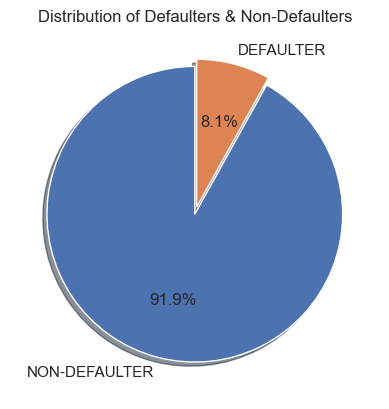

In [43]:
plt.pie(application_data_final['TARGET'].value_counts(normalize=True),labels=['NON-DEFAULTER','DEFAULTER'],explode=(0,0.05), autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Distribution of Defaulters & Non-Defaulters')
plt.show()

The dataset exhibits an unequal class distribution, with 8.1% of applicants classified as defaulters and 91.9% as non-defaulters, indicating a highly imbalanced dataset. Such imbalances can affect model performance, particularly for predicting the minority class.

To address this, we can split the data into two subsets based on the target value:

Defaulters (Target = 1): Contains rows where applicants are identified as defaulters.
Non-Defaulters (Target = 0): Contains rows where applicants are identified as non-defaulters.

In [44]:
# Dataset with Target values zeros
application_zero = application_data_final[application_data_final['TARGET']==0]
application_zero.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
1      100003       0           F            N               N   
2      100004       0           M            Y               Y   
3      100006       0           F            N               Y   
4      100007       0           M            N               Y   
5      100008       0           M            N               Y   

  AMT_ANNUITY_RANGE  AMT_CREDIT  AMT_INCOME_TOTAL  CREDIT_INCOME_RATIO  \
1            30-40Y   1293502.5          270000.0                  5.0   
2             5-10Y    135000.0           67500.0                  2.0   
3            20-30Y    312682.5          135000.0                  2.0   
4            20-30Y    513000.0          121500.0                  4.0   
5            20-30Y    490495.5           99000.0                  5.0   

  NAME_INCOME_TYPE  ... DEF_60_CNT_SOCIAL_CIRCLE AMT_REQ_CREDIT_BUREAU_DAY  \
1    State servant  ...                      0.0                       0.0   
2          Working  ...                      0.0                       0.0   
3          Working  ...                      0.0                       0.0   
4          Working  ...                      0.0                       0.0   
5    State servant  ...                      0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  NAME_CONTRACT_TYPE  \
1                       0.0                        0.0          Cash loans   
2                       0.0                        0.0     Revolving loans   
3                       0.0                        0.0          Cash loans   
4                       0.0                        0.0          Cash loans   
5                       0.0                        1.0          Cash loans   

   AMT_ANNUITY REGION_RATING_CLIENT  AMT_GOODS_PRICE EMPLOYMENT_YEAR  \
1      35698.5                    1        1129500.0            0-5Y   
2       6750.0                    2         135000.0            0-5Y   
3      29686.5                    2         297000.0           5-10Y   
4      21865.5                    2         513000.0           5-10Y   
5      27517.5                    2         454500.0            0-5Y   

  AMT_INCOME_RANGE  
1        200k-300k  
2           0-100K  
3        100K-200K  
4        100K-200K  
5           0-100K  

[5 rows x 33 columns]

In [45]:
# Dataset with Target values One's
application_1 = application_data_final[application_data_final['TARGET']==1]
application_1.head()

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       100002       1           M            N               Y   
26      100031       1           F            N               Y   
40      100047       1           M            N               Y   
42      100049       1           F            N               N   
81      100096       1           F            N               Y   

   AMT_ANNUITY_RANGE  AMT_CREDIT  AMT_INCOME_TOTAL  CREDIT_INCOME_RATIO  \
0             20-30Y    406597.5          202500.0                  2.0   
26            20-30Y    979992.0          112500.0                  9.0   
40            30-40Y   1193580.0          202500.0                  6.0   
42            10-20Y    288873.0          135000.0                  2.0   
81            10-20Y    252000.0           81000.0                  3.0   

        NAME_INCOME_TYPE  ... DEF_60_CNT_SOCIAL_CIRCLE  \
0                Working  ...                      2.0   
26               Working  ...                      0.0   
40  Commercial associate  ...                      0.0   
42               Working  ...                      0.0   
81             Pensioner  ...                      1.0   

   AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
26                       0.0                       0.0   
40                       0.0                       2.0   
42                       0.0                       0.0   
81                       0.0                       0.0   

    AMT_REQ_CREDIT_BUREAU_QRT  NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0                         0.0          Cash loans      24700.5   
26                        2.0          Cash loans      27076.5   
40                        0.0          Cash loans      35028.0   
42                        0.0          Cash loans      16258.5   
81                        0.0          Cash loans      14593.5   

   REGION_RATING_CLIENT  AMT_GOODS_PRICE EMPLOYMENT_YEAR AMT_INCOME_RANGE  
0                     2         351000.0            0-5Y        200k-300k  
26                    3         702000.0           5-10Y        100K-200K  
40                    2         855000.0            0-5Y        200k-300k  
42                    3         238500.0           5-10Y        100K-200K  
81                    2         252000.0            0-5Y           0-100K  

[5 rows x 33 columns]

To streamline the analysis and preprocessing steps, we can split the dataset into two lists: one containing categorical columns and the other containing numerical columns. This separation helps apply specific techniques for handling missing values, encoding, and scaling based on the type of data.

In [46]:
cat_col =application_1.select_dtypes(include='category').columns
num_col =application_1.select_dtypes(exclude='category').columns

Developing a function to visualize categorical columns for univariate analysis.

In [47]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    application_data_final[col].value_counts().plot.pie(autopct = "%1.2f%%", ax=ax1)
    plt.legend(loc="best",bbox_to_anchor=(0.2, 0., 0.2, 0.2))
    plt.title('% Distribution of: '+ column)

    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((application_zero[col].value_counts())/len(application_zero))
    df['1']= ((application_1[col].value_counts())/len(application_1))
    df.plot.bar(ax=ax2)
    plt.title('Comparision based on Target Value and Total Count')

    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=application_zero, ax = ax3)
    plt.xticks(rotation=70)
    plt.title('% Distribution of(Target=0): '+ column)
     # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax3.patches:
        ax3.annotate('{:.1f}%'.format((p.get_height()/len(application_zero))*100), (p.get_x()+0.3, p.get_height()+60))
        
    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=application_1, ax = ax4)
    plt.xticks(rotation=70)
    plt.title('% Distribution of(Target=1): '+ column)
    for p in ax4.patches:
        ax4.annotate('{:.1f}%'.format((p.get_height()/len(application_1))*100), (p.get_x()+0.3, p.get_height()+60))

    fig.tight_layout()
    plt.show()

Plotting : NAME_CONTRACT_TYPE


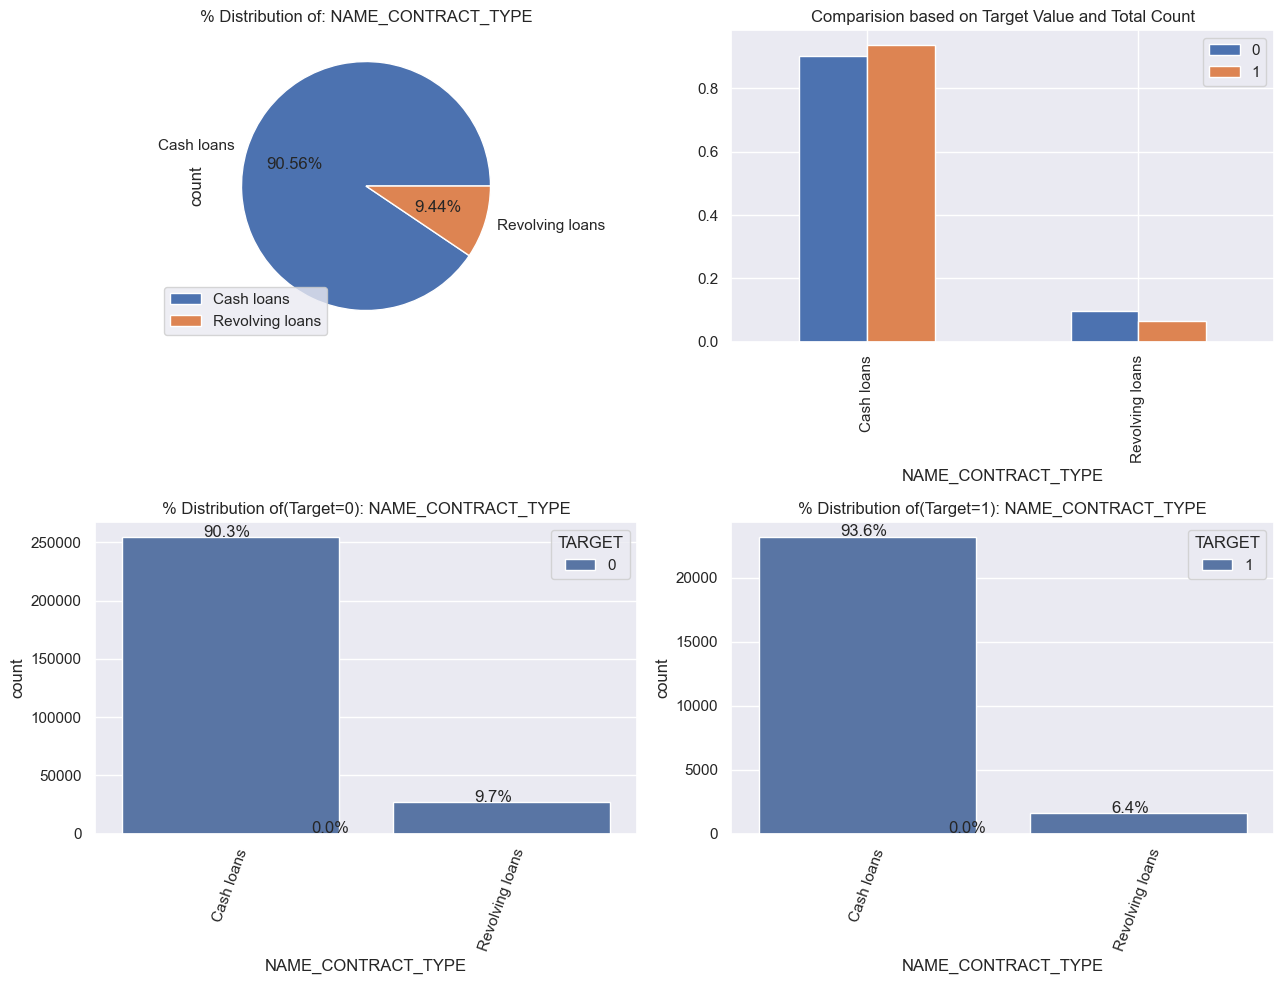

Plotting : CODE_GENDER


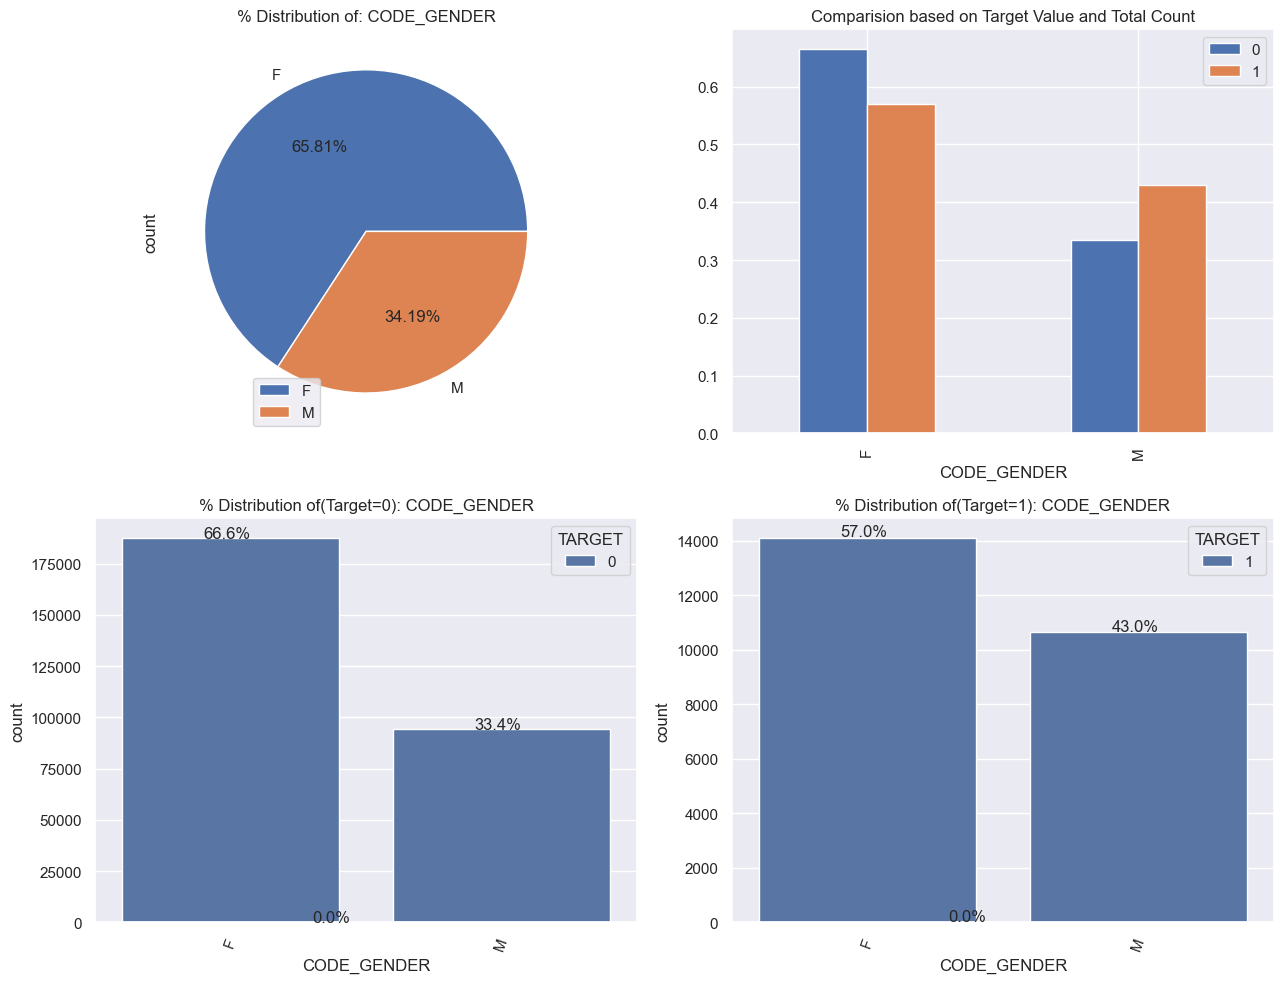

Plotting : FLAG_OWN_CAR


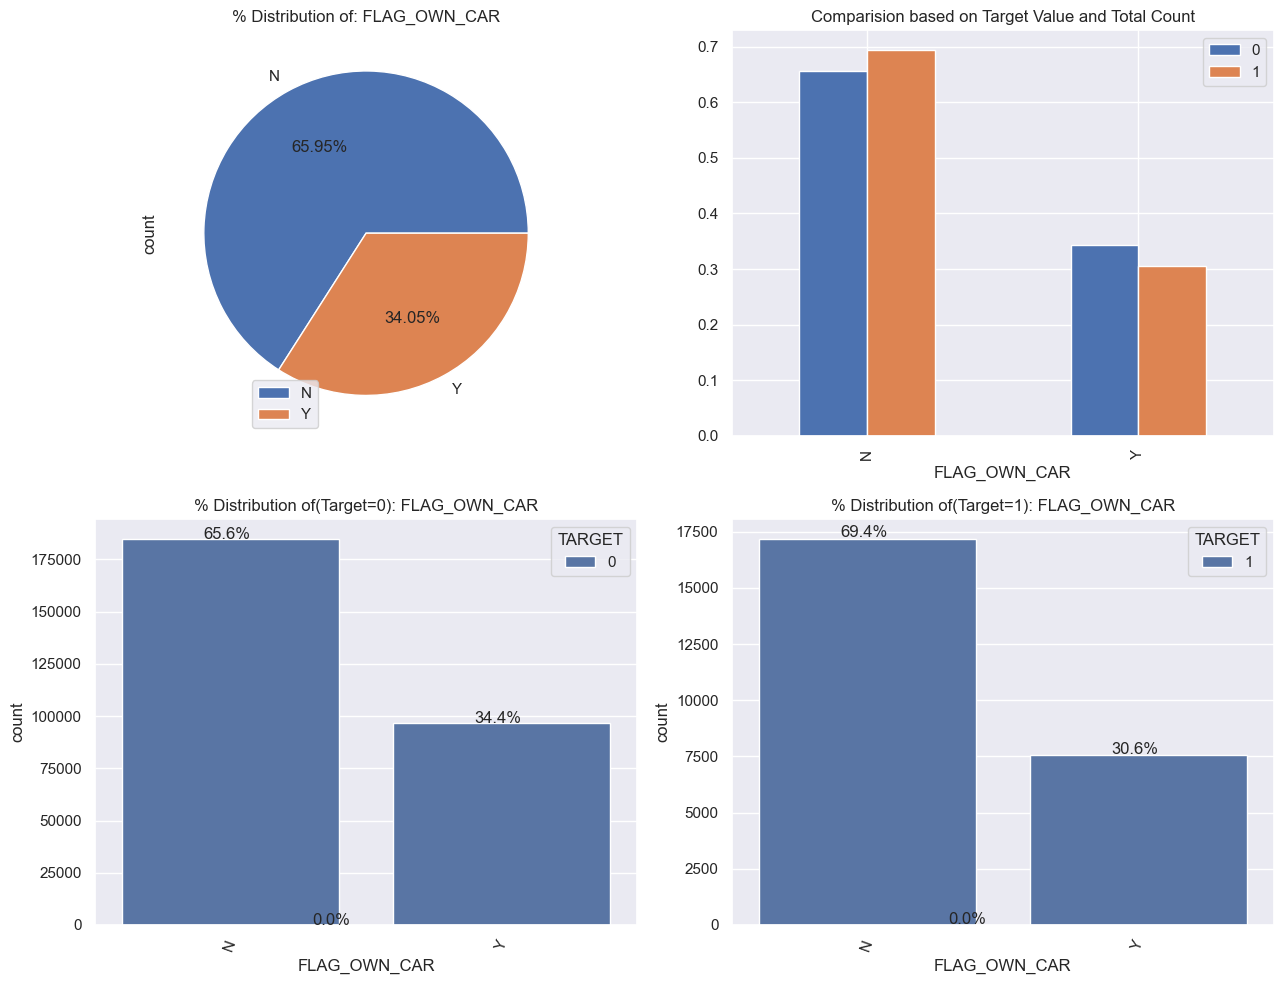

Plotting : FLAG_OWN_REALTY


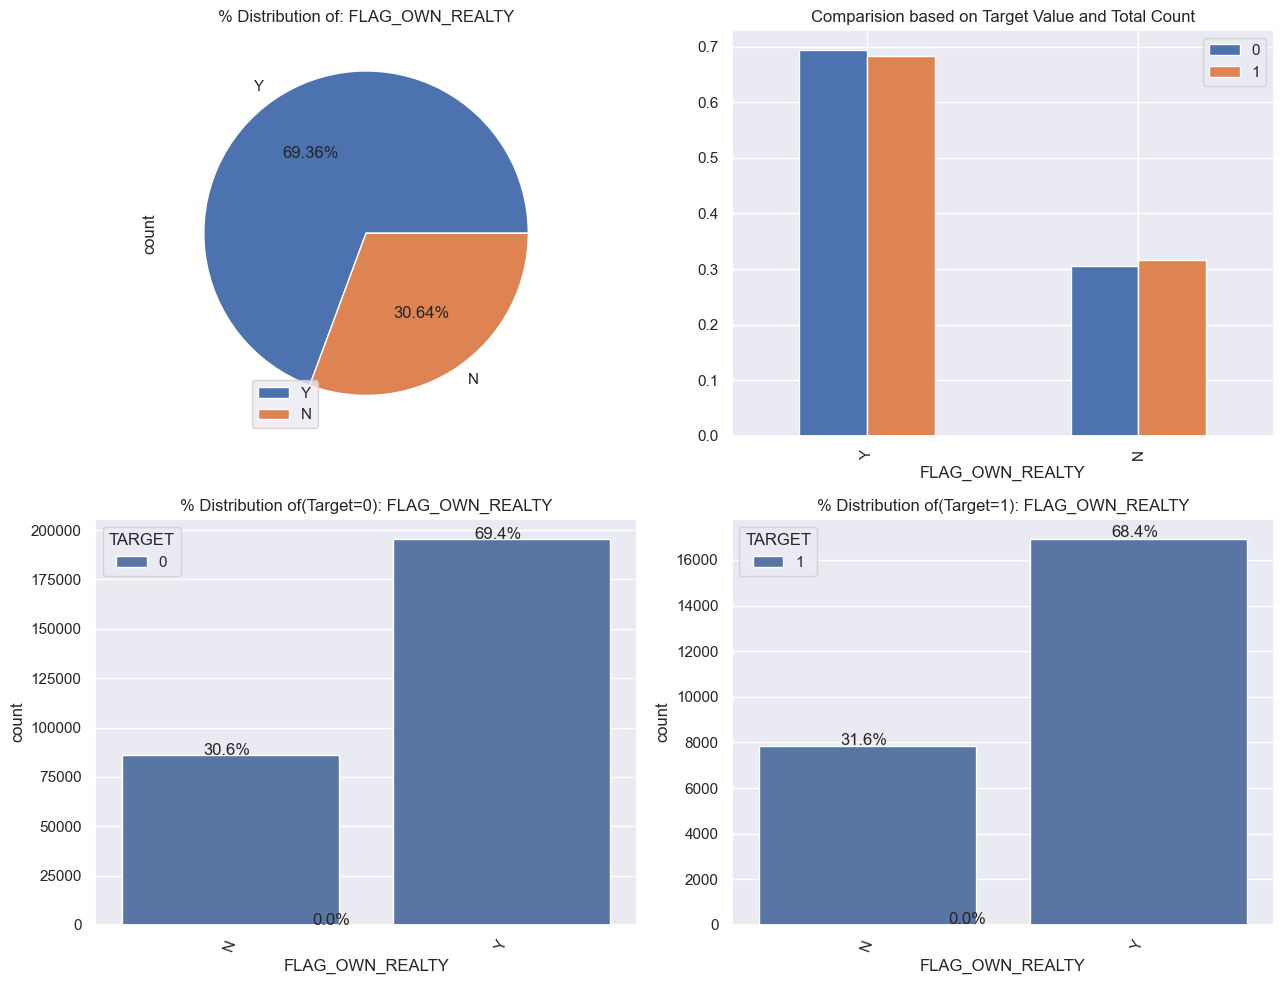

Plotting : NAME_INCOME_TYPE


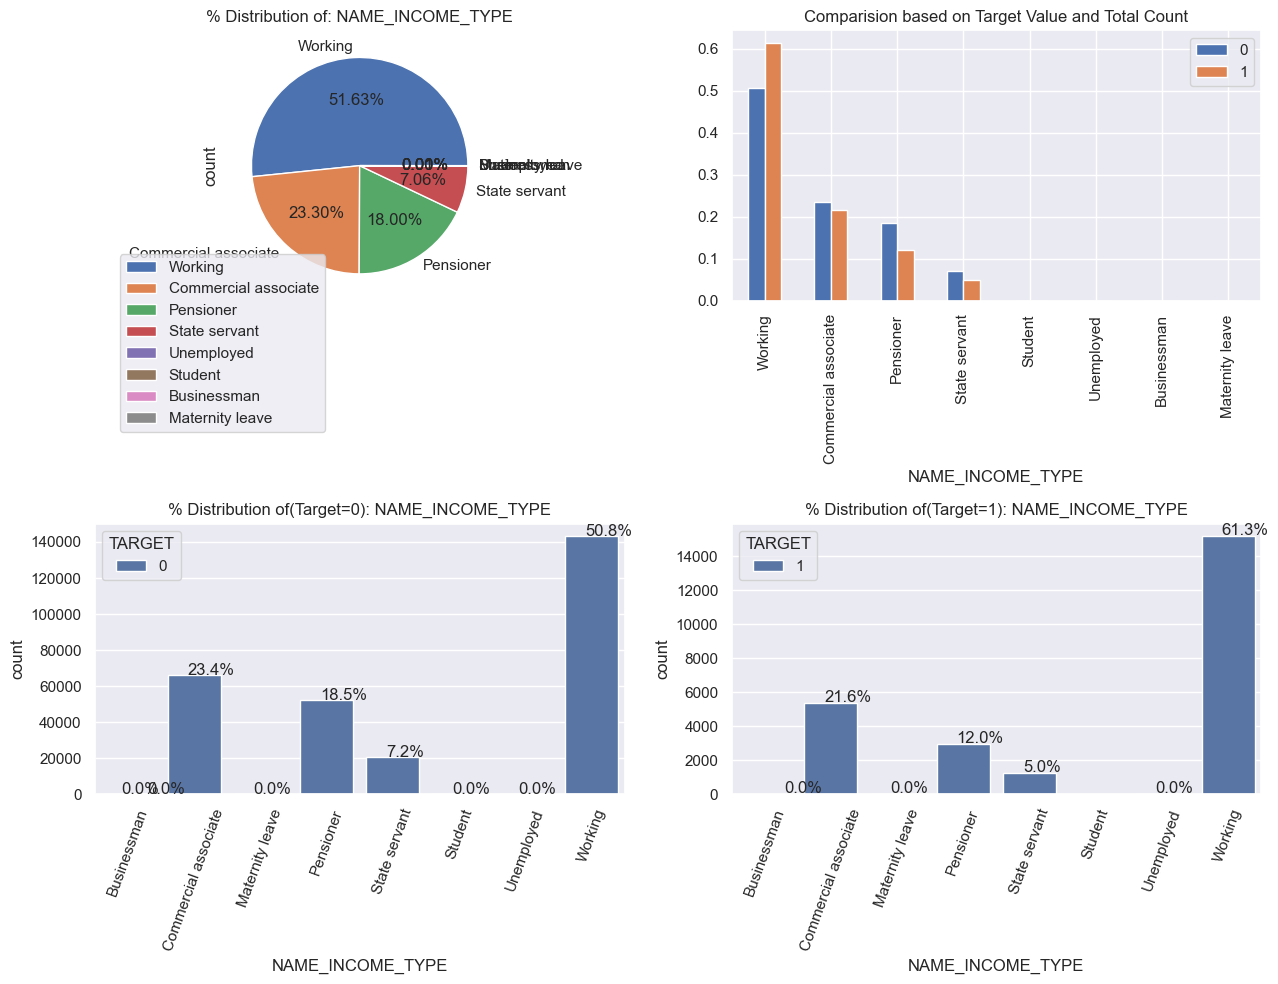

Plotting : NAME_EDUCATION_TYPE


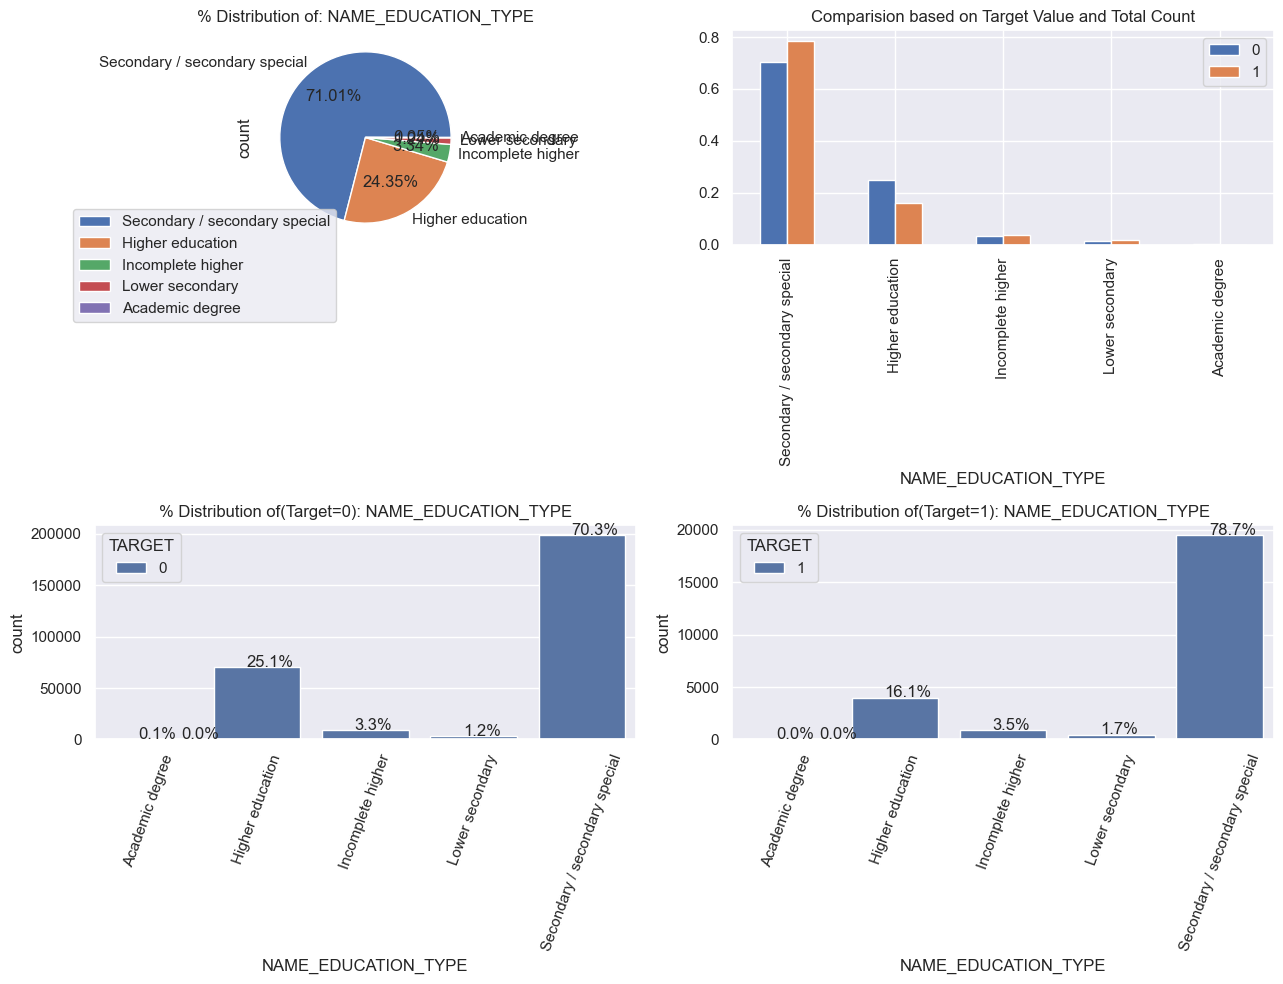

Plotting : NAME_FAMILY_STATUS


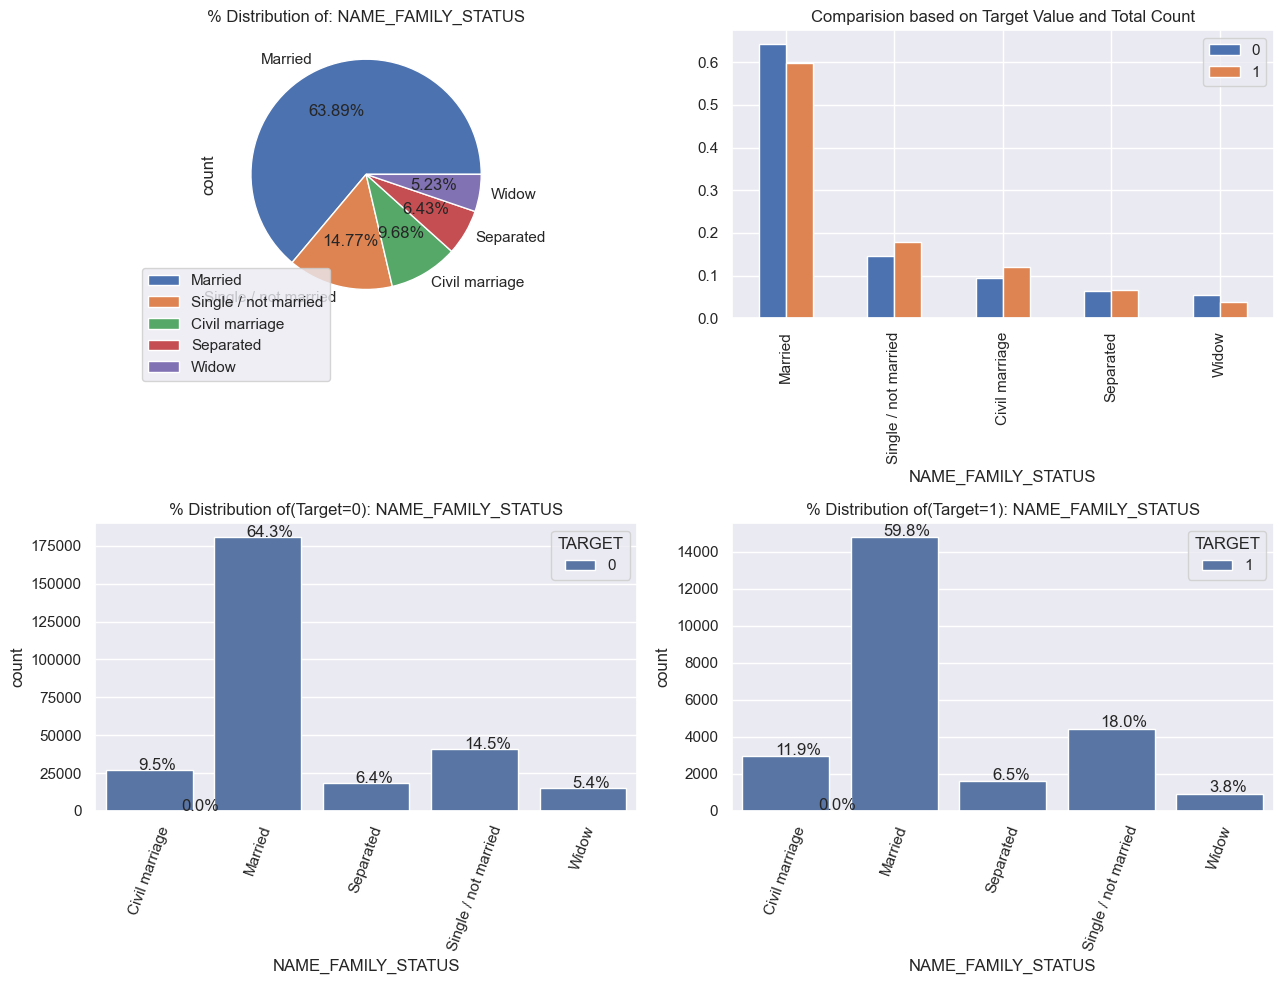

Plotting : NAME_HOUSING_TYPE


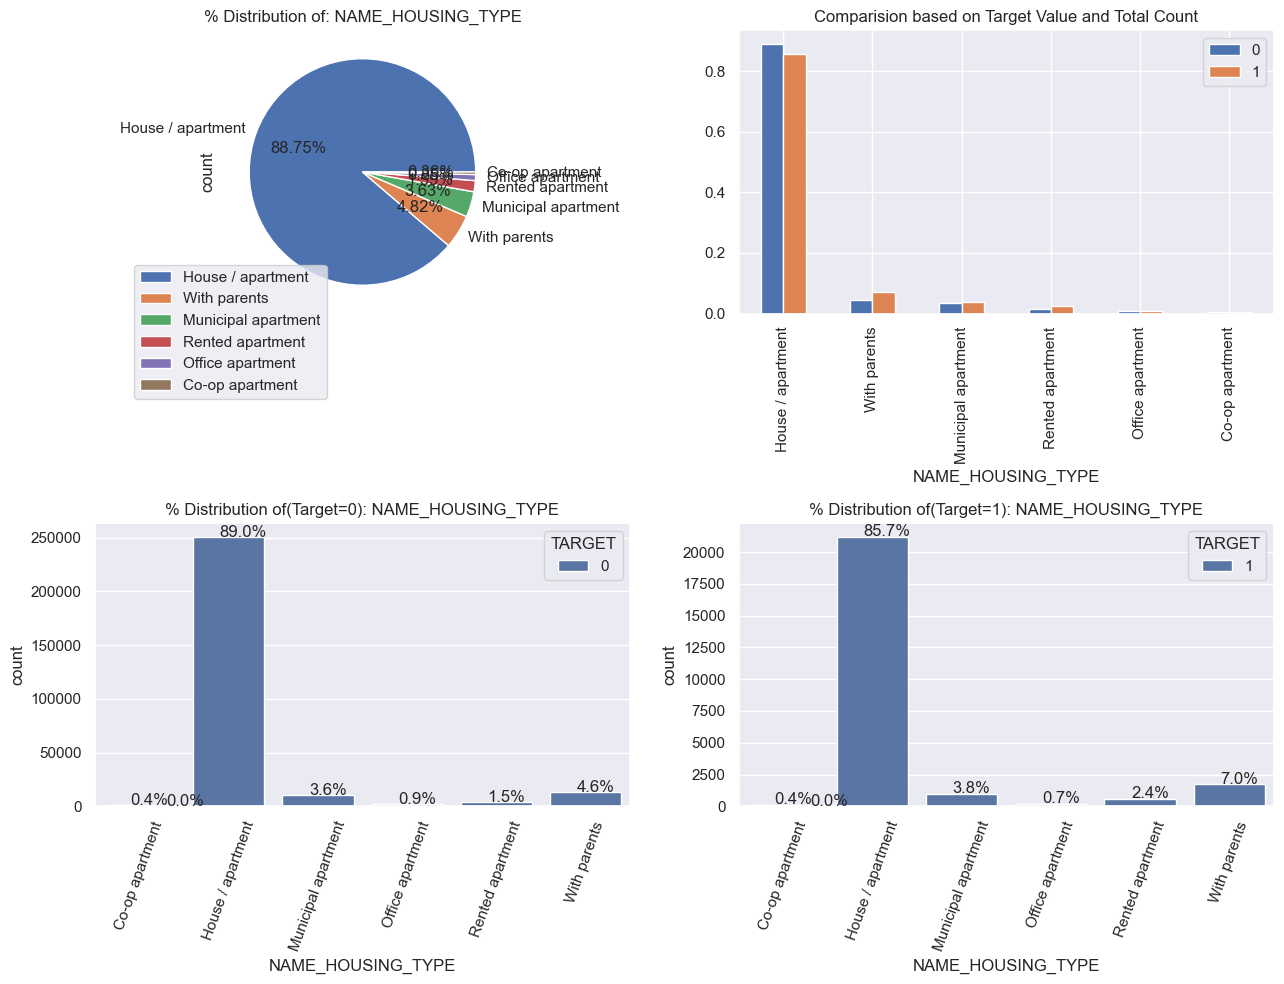

Plotting : REGION_RATING_CLIENT


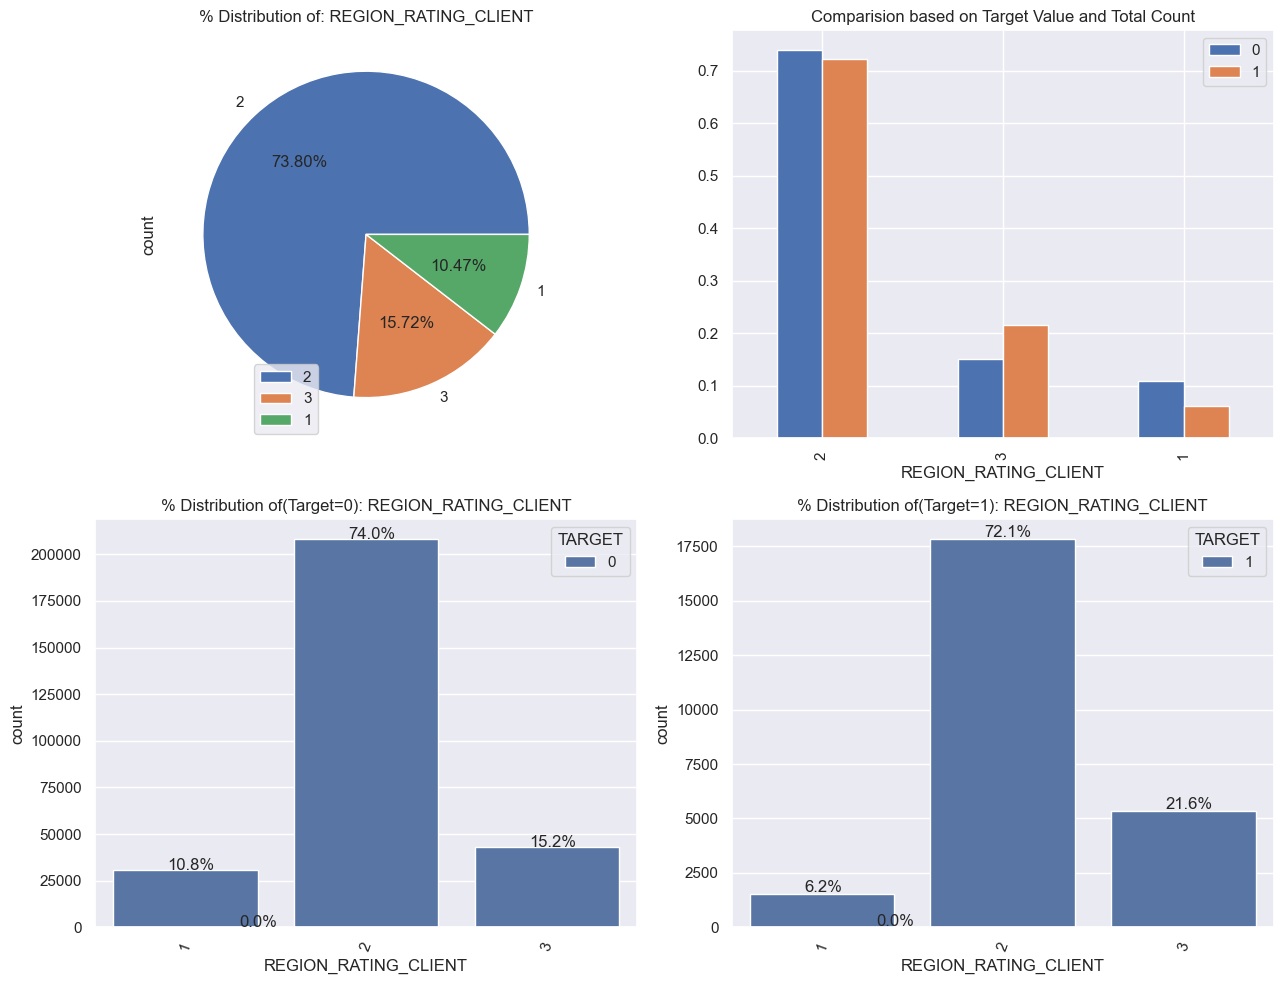

Plotting : AMT_INCOME_RANGE


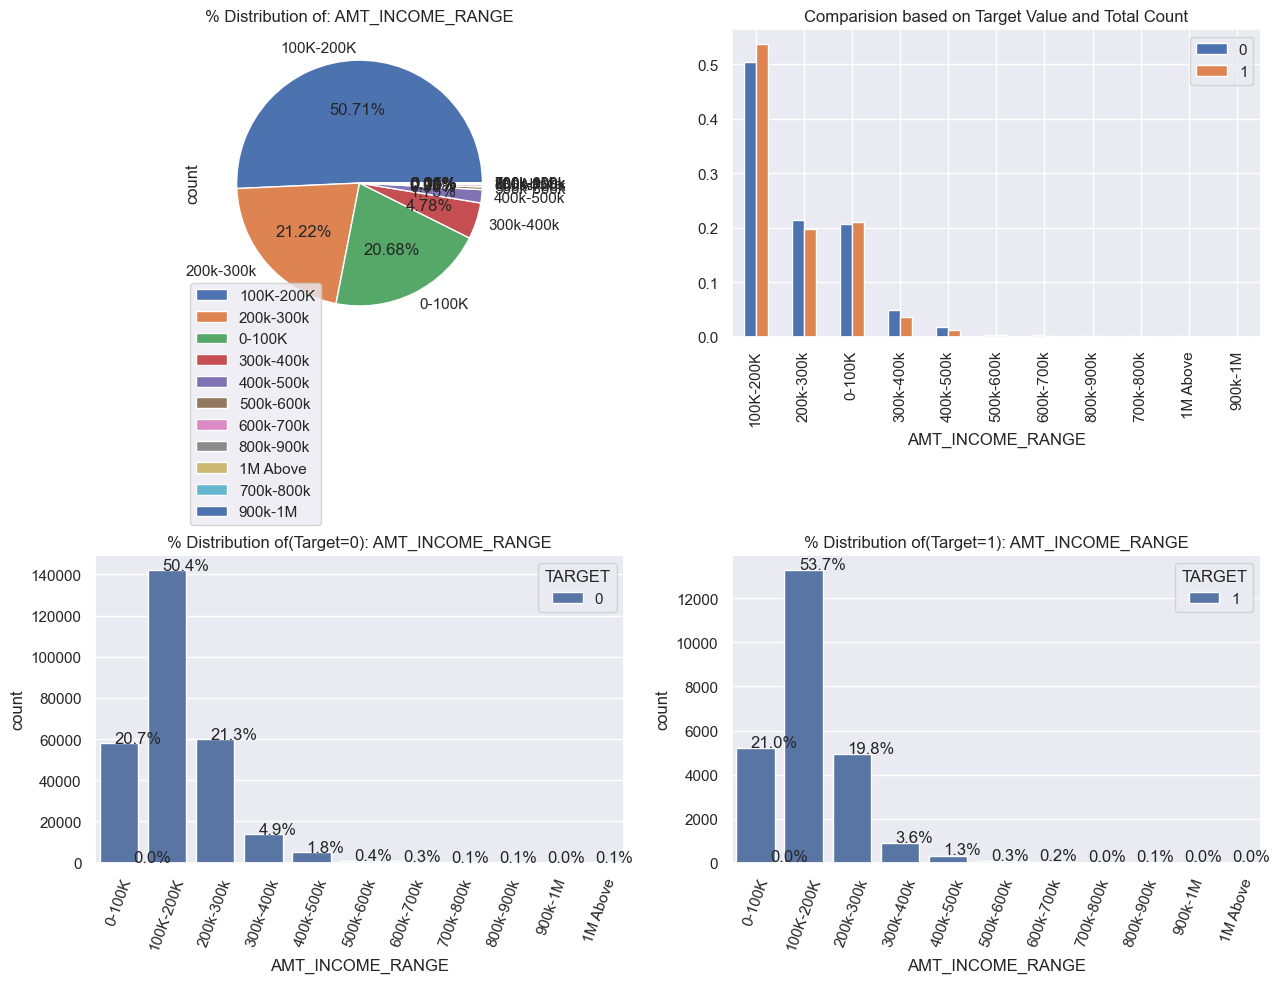

Plotting : EMPLOYMENT_YEAR


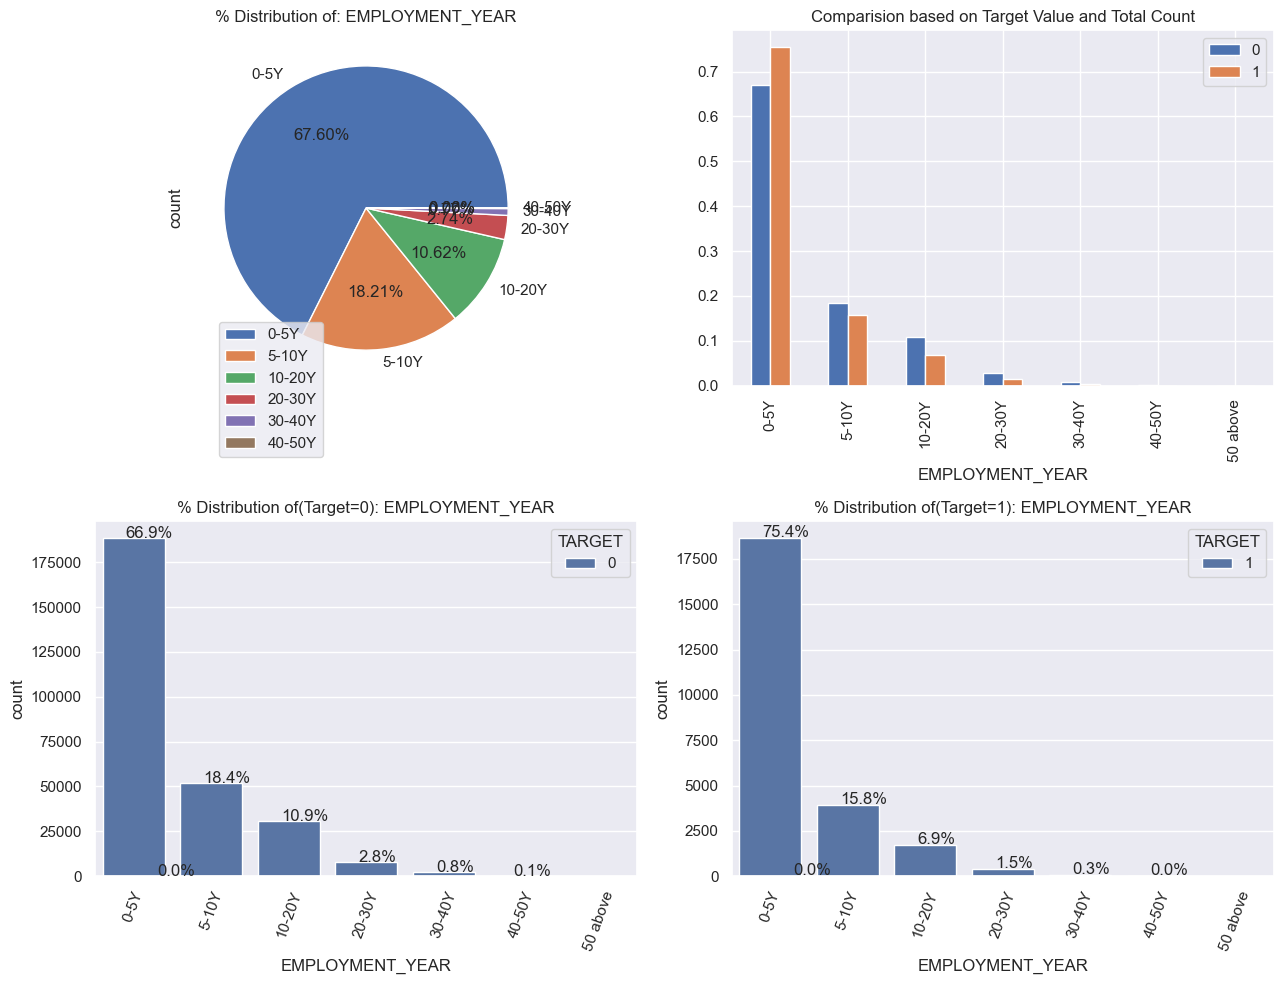

Plotting : AMT_ANNUITY_RANGE


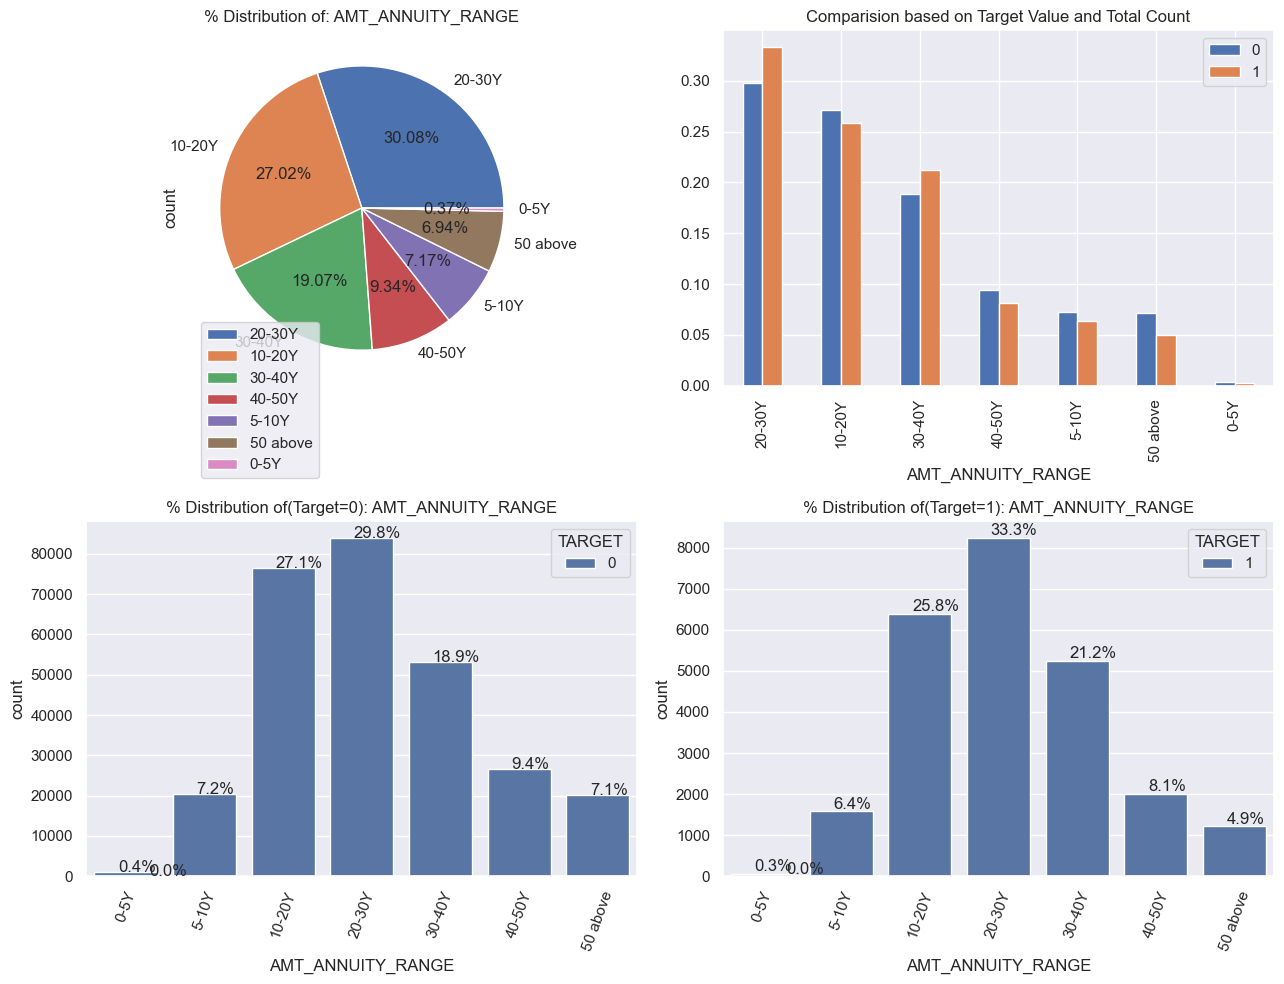

In [48]:
plotcol = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
           'NAME_HOUSING_TYPE','REGION_RATING_CLIENT','AMT_INCOME_RANGE','EMPLOYMENT_YEAR', 'AMT_ANNUITY_RANGE']

for col in plotcol:
  print("Plotting :",col)
  plotting(col, 'TARGET')

### Insights:

1. **Name Contact Type**:  
   - 90% of applicants belong to the *Cash Loan* category.  
   - Among defaulters, 93% are from the *Cash Loan* group, indicating a strong correlation.

2. **Gender**:  
   - Female applicants constitute **66%** of the dataset.  
   - Despite being fewer in number, male applicants show a higher default ratio compared to females.

3. **Car Ownership**:  
   - Around **66%** of applicants do not own a car, and this group also exhibits a higher default rate.  

4. **Income Type**:  
   - **51%** of applicants are from the *Working Class*, and this group has the highest default rate.  
   - **61%** of defaulters are working-class individuals, while *Businessmen* have zero defaults.

5. **Education Type**:  
   - **71%** of applicants have a *Secondary Education*, and they also show the highest default rate.  

6. **Family Status**:  
   - **64%** of applicants are married, followed by those who are single or in civil marriages.  
   - However, default rates are higher among single and civil marriage applicants.

7. **Region Rating**:  
   - **73%** of applicants belong to *Region Rating 2*, followed by *Ratings 3 and 1*.  
   - Defaults are **15% higher** for applicants in *Region Rating 3*.  

8. **Annuity Range**:  
   - Applicants in the annuity range of **20-40 years** tend to default at a higher rate.

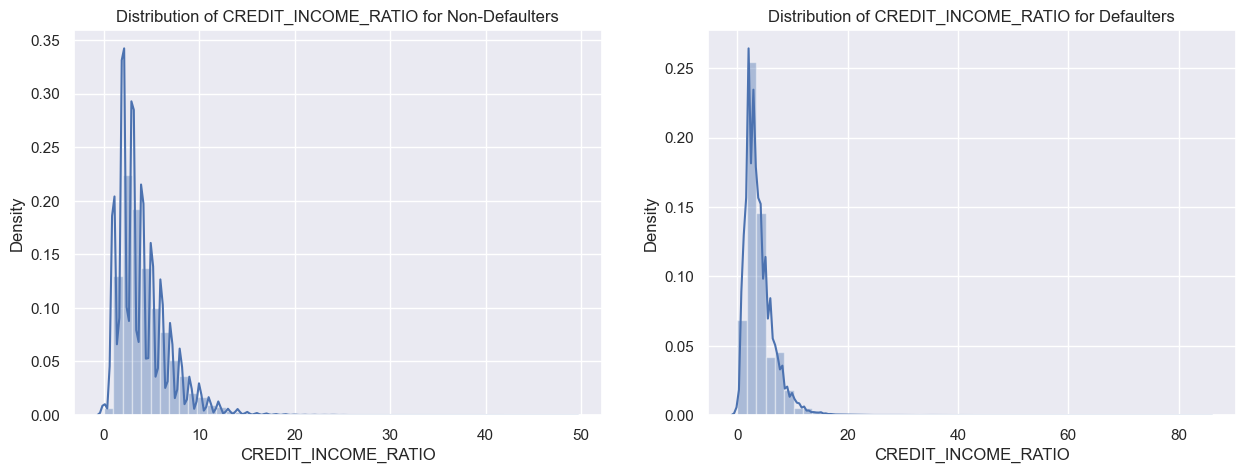

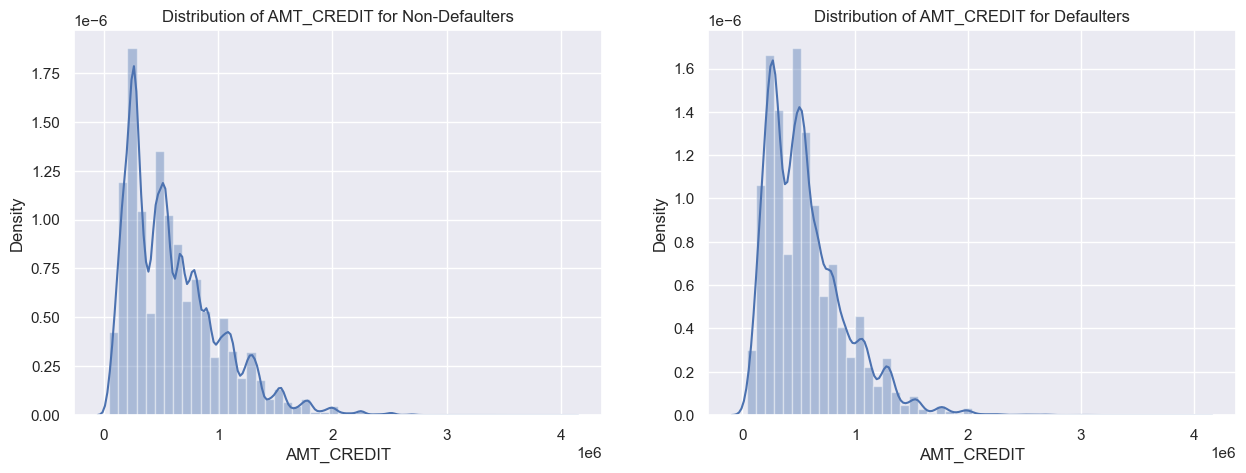

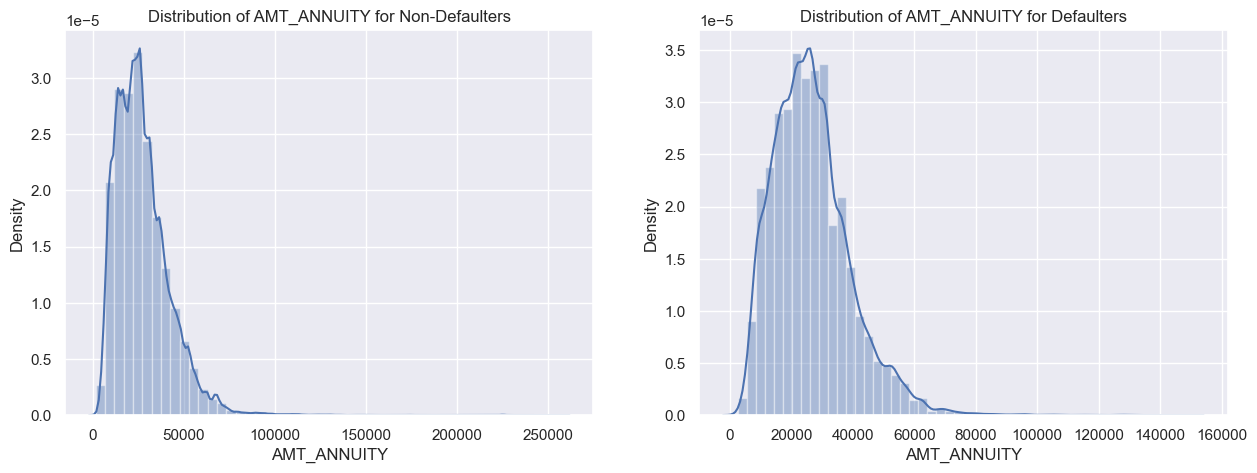

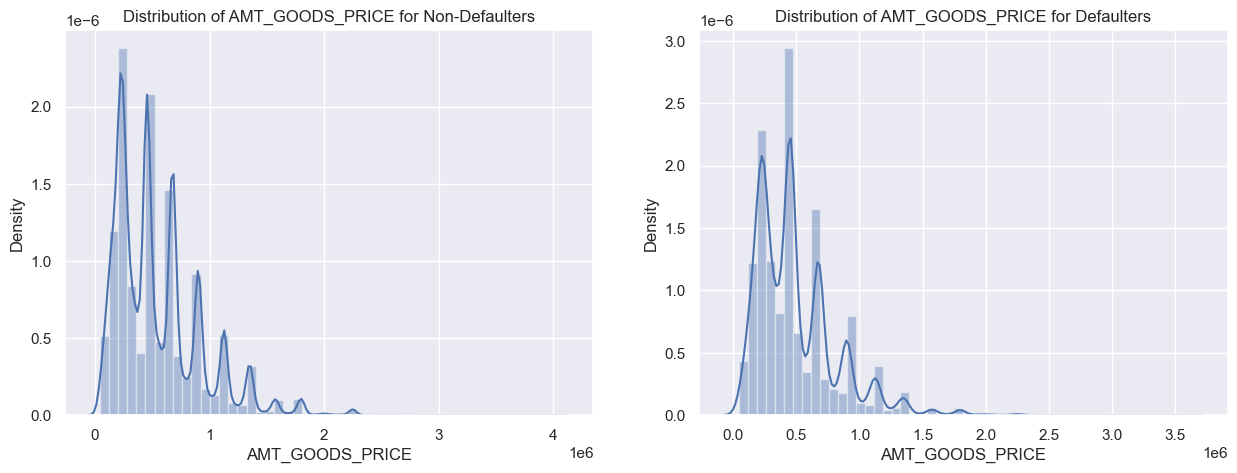

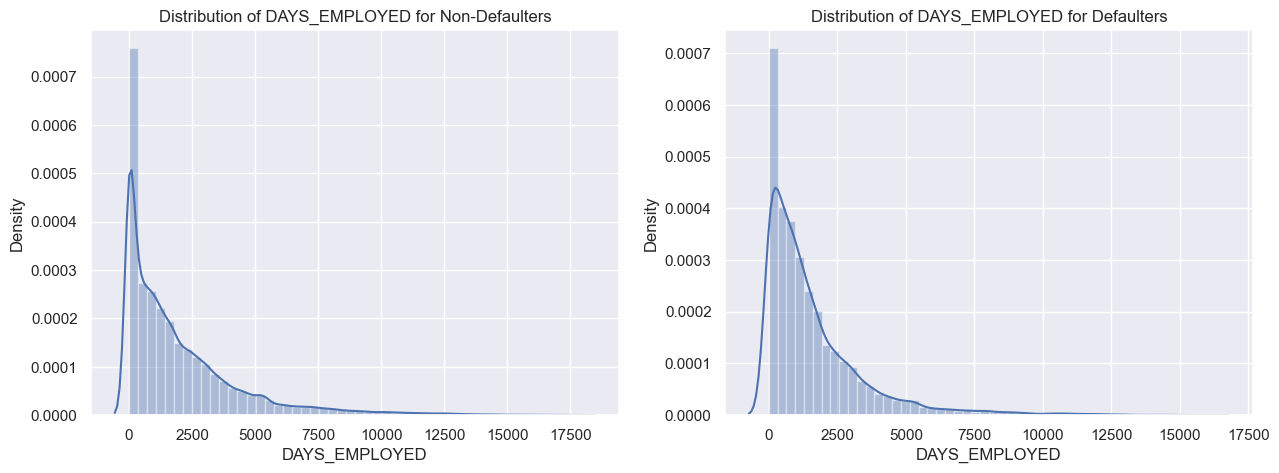

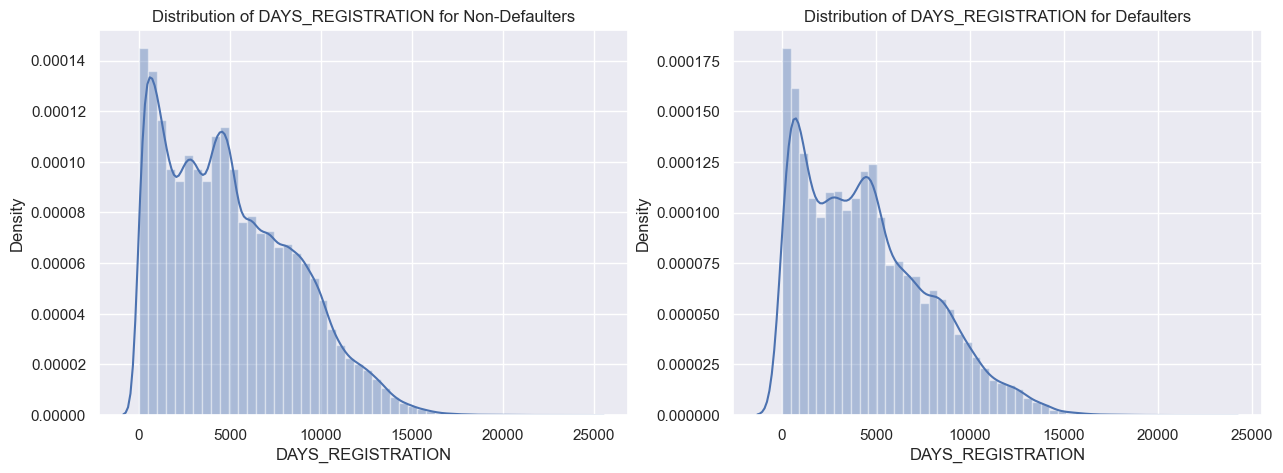

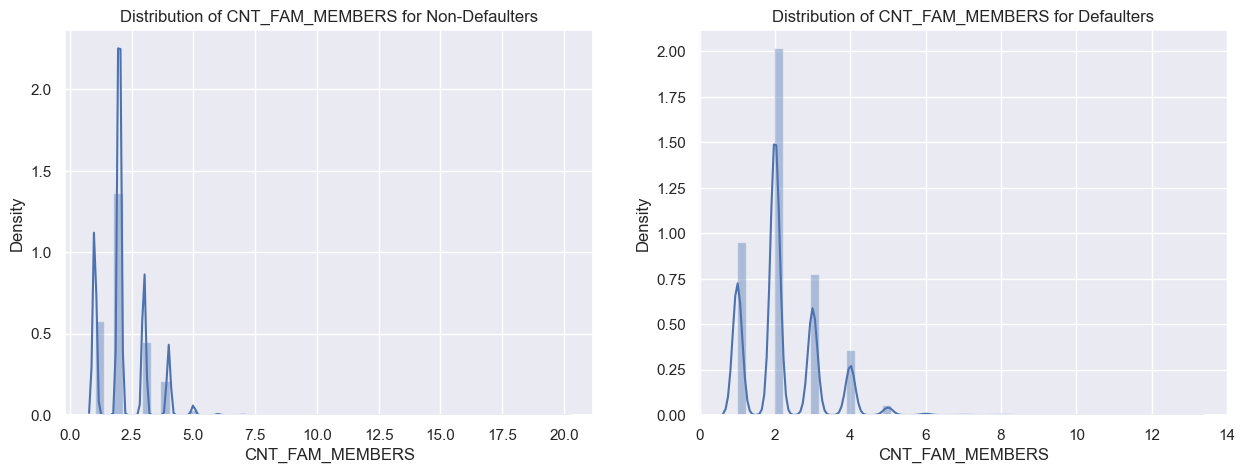

In [49]:
num_col0=['CREDIT_INCOME_RATIO','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_REGISTRATION','CNT_FAM_MEMBERS']
for col in num_col0:
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
  sns.distplot(a=application_zero[col],ax=ax1)
  ax1.set_title(f'Distribution of {col} for Non-Defaulters',fontsize=12)
  sns.distplot(a=application_1[col],ax=ax2)
  ax2.set_title(f'Distribution of {col} for Defaulters',fontsize=12)
  plt.show()

### Corelation table 

In [50]:
# Step 1: Ensure only numeric columns are used
numeric_df = application_zero.select_dtypes(include=[np.number])

# Step 2: Check and handle duplicate column names
if numeric_df.columns.duplicated().any():
    print("Duplicate columns detected. Renaming them to make them unique.")
    # Append a suffix to duplicate column names
    numeric_df.columns = [
        f"{col}_{i}" if numeric_df.columns[:i].tolist().count(col) > 0 else col
        for i, col in enumerate(numeric_df.columns)
    ]

# Step 3: Compute the correlation matrix
corr = numeric_df.corr()

# Step 4: Mask the upper triangle to avoid duplicate correlations
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_df = corr.where(mask).stack().reset_index()

# Step 5: Rename the columns for clarity
corr_df.columns = ['Column1', 'Column2', 'Correlation']

# Step 6: Add absolute correlation and sort by it
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)

# Step 7: Display the top 10 correlations
print("Top 10 Correlations:")
corr_df.head(10)




Duplicate columns detected. Renaming them to make them unique.
Top 10 Correlations:


Column1                      Column2  Correlation  \
101  OBS_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE_11     1.000000   
109  DEF_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE_12     1.000000   
30                 AMT_CREDIT              AMT_GOODS_PRICE     0.987254   
135               AMT_ANNUITY              AMT_GOODS_PRICE     0.776730   
29                 AMT_CREDIT                  AMT_ANNUITY     0.771163   
17                 AMT_CREDIT          CREDIT_INCOME_RATIO     0.648409   
57        CREDIT_INCOME_RATIO              AMT_GOODS_PRICE     0.628663   
43           AMT_INCOME_TOTAL                  AMT_ANNUITY     0.418649   
56        CREDIT_INCOME_RATIO                  AMT_ANNUITY     0.391166   
44           AMT_INCOME_TOTAL              AMT_GOODS_PRICE     0.349357   

     Abs_Correlation  
101         1.000000  
109         1.000000  
30          0.987254  
135         0.776730  
29          0.771163  
17          0.648409  
57          0.628663  
43          0.418649  
56          0.391166  
44          0.349357

In [51]:
# Step 1: Ensure only numeric columns are used
numeric_df = application_1.select_dtypes(include=[np.number])

# Step 2: Check and handle duplicate column names
if numeric_df.columns.duplicated().any():
    print("Duplicate columns detected. Renaming them to make them unique.")
    # Append a suffix to duplicate column names
    numeric_df.columns = [
        f"{col}_{i}" if numeric_df.columns[:i].tolist().count(col) > 0 else col
        for i, col in enumerate(numeric_df.columns)
    ]

# Step 3: Compute the correlation matrix
corr = numeric_df.corr()

# Step 4: Mask the upper triangle to avoid duplicate correlations
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_df = corr.where(mask).stack().reset_index()

# Step 5: Rename the columns for clarity
corr_df.columns = ['Column1', 'Column2', 'Correlation']

# Step 6: Add absolute correlation and sort by it
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)

# Step 7: Display the top 10 correlations
print("Top 10 Correlations:")
corr_df.head(10)




Duplicate columns detected. Renaming them to make them unique.
Top 10 Correlations:


Column1                      Column2  Correlation  \
101  OBS_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE_11     1.000000   
109  DEF_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE_12     1.000000   
30                 AMT_CREDIT              AMT_GOODS_PRICE     0.983100   
135               AMT_ANNUITY              AMT_GOODS_PRICE     0.752575   
29                 AMT_CREDIT                  AMT_ANNUITY     0.751806   
17                 AMT_CREDIT          CREDIT_INCOME_RATIO     0.639443   
57        CREDIT_INCOME_RATIO              AMT_GOODS_PRICE     0.622972   
56        CREDIT_INCOME_RATIO                  AMT_ANNUITY     0.380674   
100  OBS_60_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE     0.264390   
102  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE_12     0.264390   

     Abs_Correlation  
101         1.000000  
109         1.000000  
30          0.983100  
135         0.752575  
29          0.751806  
17          0.639443  
57          0.622972  
56          0.380674  
100         0.264390  
102         0.264390

In [52]:
def mulvarplot(col1,col2,hue_col):
  sns.set_theme(style='white', palette='deep', font='sans-serif')
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
  sns.scatterplot(x=col1,y=col2,data=application_zero,markers=True,hue=hue_col,legend='auto',ax=ax1)
  ax1.set_xlabel(col1)
  ax1.set_ylabel(col2)
  ax1.set_title(f'{col1} vs {col2} for Non-Defaulters',fontsize=12)

  sns.scatterplot(x=col1,y=col2,data=application_1,markers=True,hue=hue_col,legend='auto',ax=ax2)
  ax2.set_xlabel(col1)
  ax2.set_ylabel(col2)
  ax2.set_title(f'{col1} vs {col2} for Defaulterss ',fontsize=12)

  plt.show()

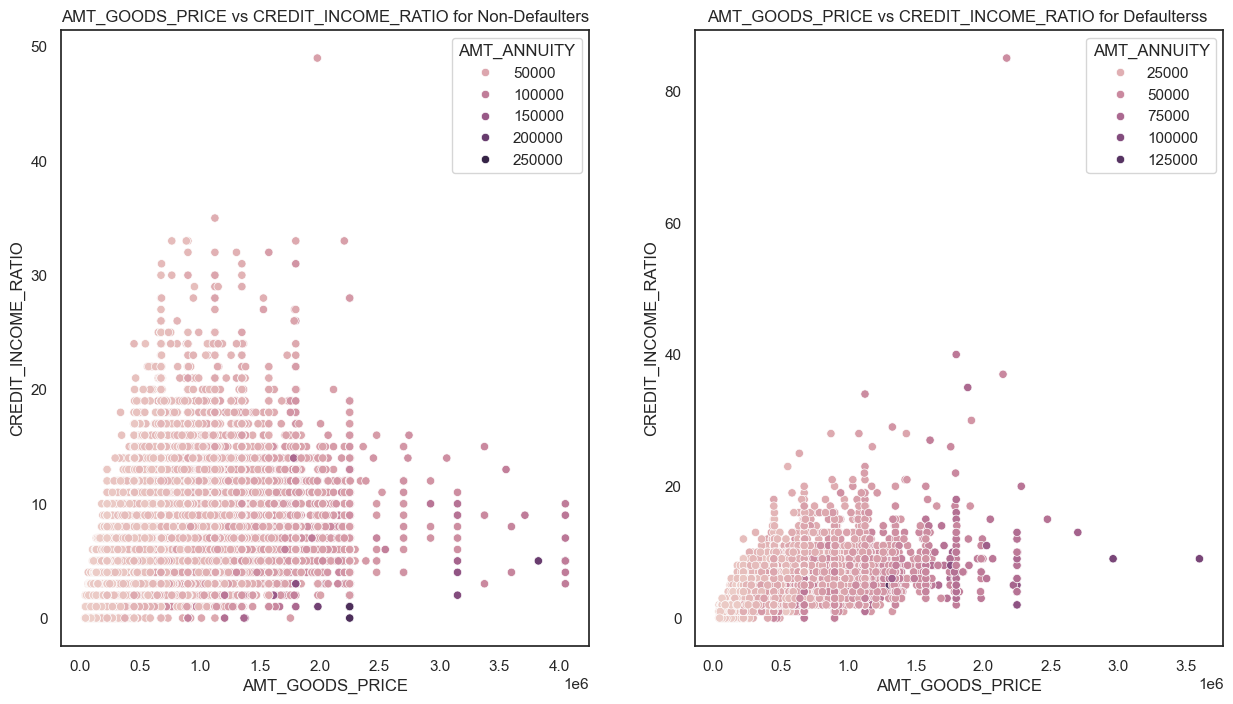

In [53]:
mulvarplot('AMT_GOODS_PRICE','CREDIT_INCOME_RATIO','AMT_ANNUITY')

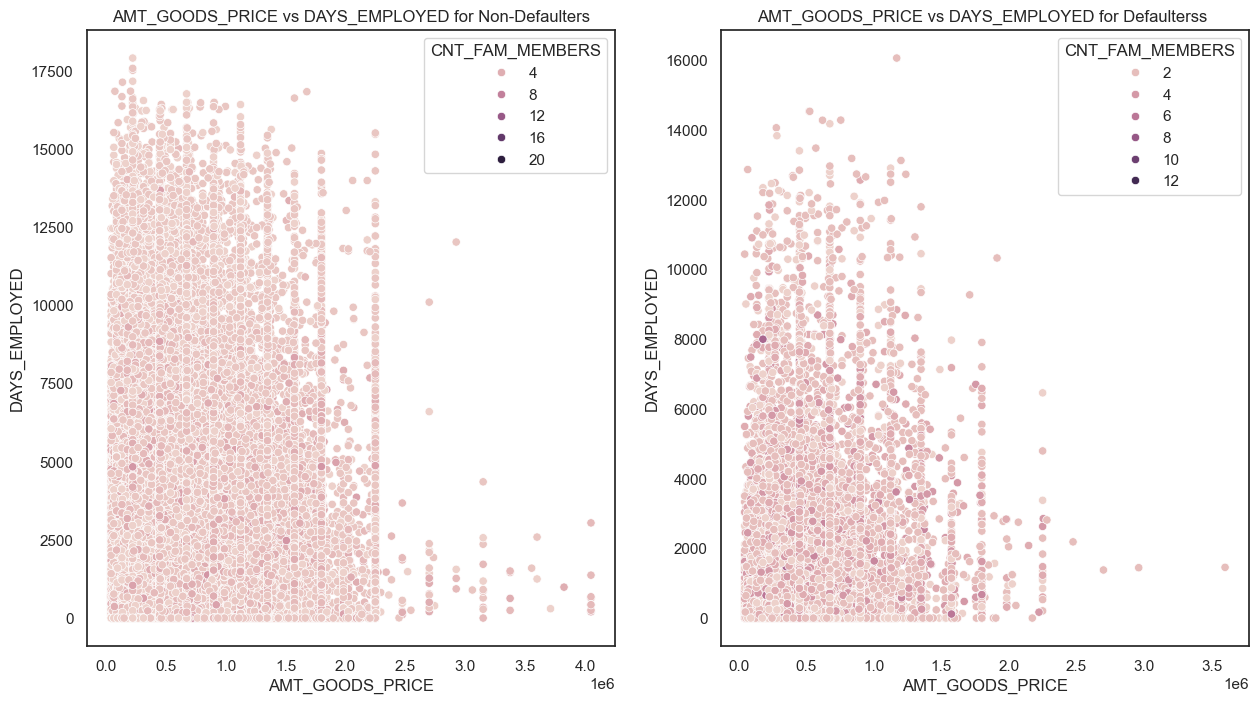

In [54]:
mulvarplot('AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_FAM_MEMBERS')

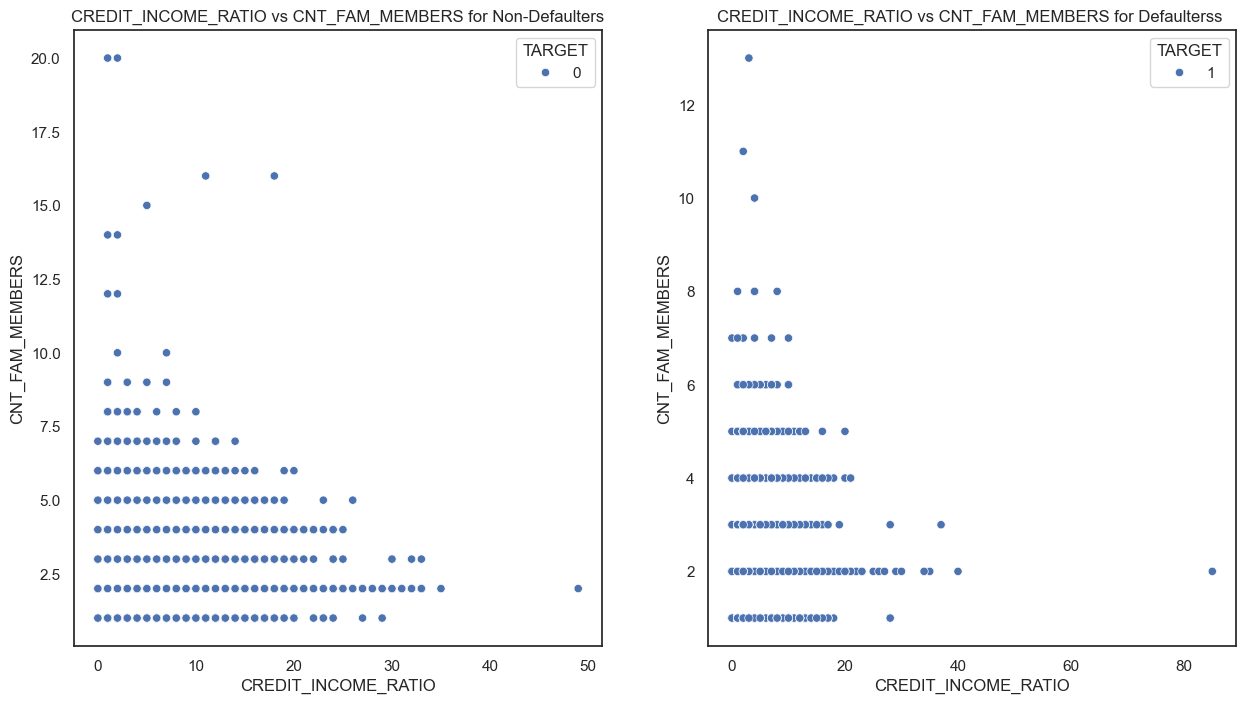

In [55]:
mulvarplot('CREDIT_INCOME_RATIO','CNT_FAM_MEMBERS','TARGET')

### Additional Insights:

1. **Credit-Income Ratio**:  
   - Applicants with a **lower Credit-Income Ratio** exhibit a significantly higher default rate, indicating a potential inability to manage credit effectively relative to their income.

2. **Employment Duration**:  
   - Applicants with a **shorter employment period** tend to default more frequently, likely reflecting job instability or insufficient financial history.

3. **Family Members**:  
   - Applicants with **4-8 family members** show a higher default rate, possibly due to increased financial responsibilities and expenses.

### Previous Application

Now let's deep dive into the previous application data for more insights

In [56]:

# % of Null Values w.r.t to all the columns of Current Application:
(prev_application_data.isnull().mean()).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       9.964370e-01
RATE_INTEREST_PRIMARY          9.964370e-01
AMT_DOWN_PAYMENT               5.363648e-01
RATE_DOWN_PAYMENT              5.363648e-01
NAME_TYPE_SUITE                4.911975e-01
DAYS_TERMINATION               4.029813e-01
DAYS_FIRST_DRAWING             4.029813e-01
DAYS_FIRST_DUE                 4.029813e-01
DAYS_LAST_DUE_1ST_VERSION      4.029813e-01
DAYS_LAST_DUE                  4.029813e-01
NFLAG_INSURED_ON_APPROVAL      4.029813e-01
AMT_GOODS_PRICE                2.308177e-01
AMT_ANNUITY                    2.228667e-01
CNT_PAYMENT                    2.228637e-01
PRODUCT_COMBINATION            2.071591e-04
AMT_CREDIT                     5.987257e-07
SK_ID_PREV                     0.000000e+00
AMT_APPLICATION                0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
SK_ID_CURR                     0.000000e+00
WEEKDAY_APPR_PROCESS_START     0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_PAYMENT_TYPE              0

In [57]:
# droping some of unwanted columns 
prev_application_data.drop(labels=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY',
                      'AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE',
                      'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION'],axis=1,inplace=True)

### Removing columns with more than 40% missing values.

In [58]:
prev_application_data = prev_application_data.loc[:,prev_application_data.isnull().mean()<=0.40]


# checking the null value % in Previous Application Dataframe
(round(prev_application_data.isnull().sum() / prev_application_data.shape[0] * 100.00,2)).sort_values(ascending=False)


AMT_GOODS_PRICE           23.08
AMT_ANNUITY               22.29
CNT_PAYMENT               22.29
PRODUCT_COMBINATION        0.02
SK_ID_CURR                 0.00
SK_ID_PREV                 0.00
AMT_CREDIT                 0.00
AMT_APPLICATION            0.00
NAME_CONTRACT_TYPE         0.00
NAME_CASH_LOAN_PURPOSE     0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_GOODS_CATEGORY        0.00
NAME_CLIENT_TYPE           0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
SELLERPLACE_AREA           0.00
CHANNEL_TYPE               0.00
NAME_SELLER_INDUSTRY       0.00
NAME_YIELD_GROUP           0.00
dtype: float64

The `Days Decision` columns should be transformed to have positive values.

In [59]:
prev_application_data['DAYS_DECISION']=abs(prev_application_data['DAYS_DECISION'])

In [60]:
## Creating bin of Days Decision:

bins = [0,400,800,1200,1600,2000,2400,2800,3200]
slots = ['0-400','400-800','800-1200','1200-1600','1600-2000','2000-2400','2400-2800','2800-3200']
prev_application_data['DAYS_DECISION_RANGE']=pd.cut(prev_application_data['DAYS_DECISION'],bins=bins,labels=slots)

In [61]:
prev_application_data['DAYS_DECISION_RANGE'].value_counts(normalize=True)*100


DAYS_DECISION_RANGE
0-400        37.574526
400-800      22.900299
800-1200     12.426012
1200-1600     7.899646
2400-2800     6.292188
1600-2000     5.791174
2000-2400     5.689750
2800-3200     1.426404
Name: proportion, dtype: float64

### Insight:  
Approximately **37%** of loan applicants have applied for a new loan within **0-400 days** of their previous loan decision.

[]

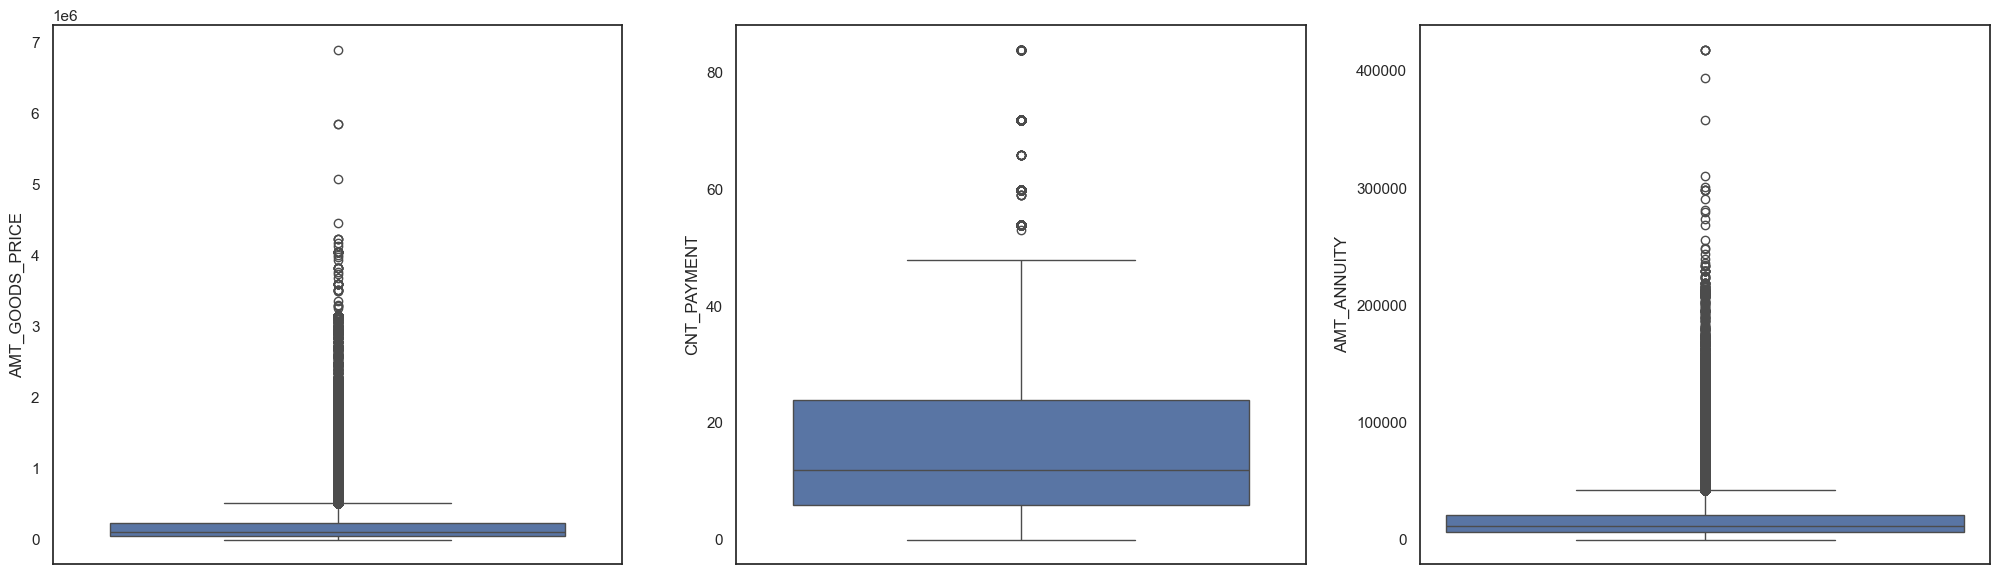

In [62]:
# these 3 columns do have some missing values let us observe the distribution along with boxplot
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(25,7))
sns.boxplot((prev_application_data.AMT_GOODS_PRICE),ax=ax1)
sns.boxplot((prev_application_data.CNT_PAYMENT),ax=ax2)
sns.boxplot((prev_application_data.AMT_ANNUITY),ax=ax3)
plt.plot()

 Imputing Null values

In [63]:
# Let us impute null values:
n_col = ['AMT_GOODS_PRICE','CNT_PAYMENT','AMT_ANNUITY']
for col in n_col:
    prev_application_data[col]=prev_application_data[col].fillna(value=prev_application_data[col].median())
    prev_application_data[col].isnull().sum()

prev_application_data['PRODUCT_COMBINATION']=prev_application_data['PRODUCT_COMBINATION'].fillna(value=prev_application_data['PRODUCT_COMBINATION'].mode())

Let's visualize the categorical columns from the Previous Application dataset to analyze their distributions and patterns.

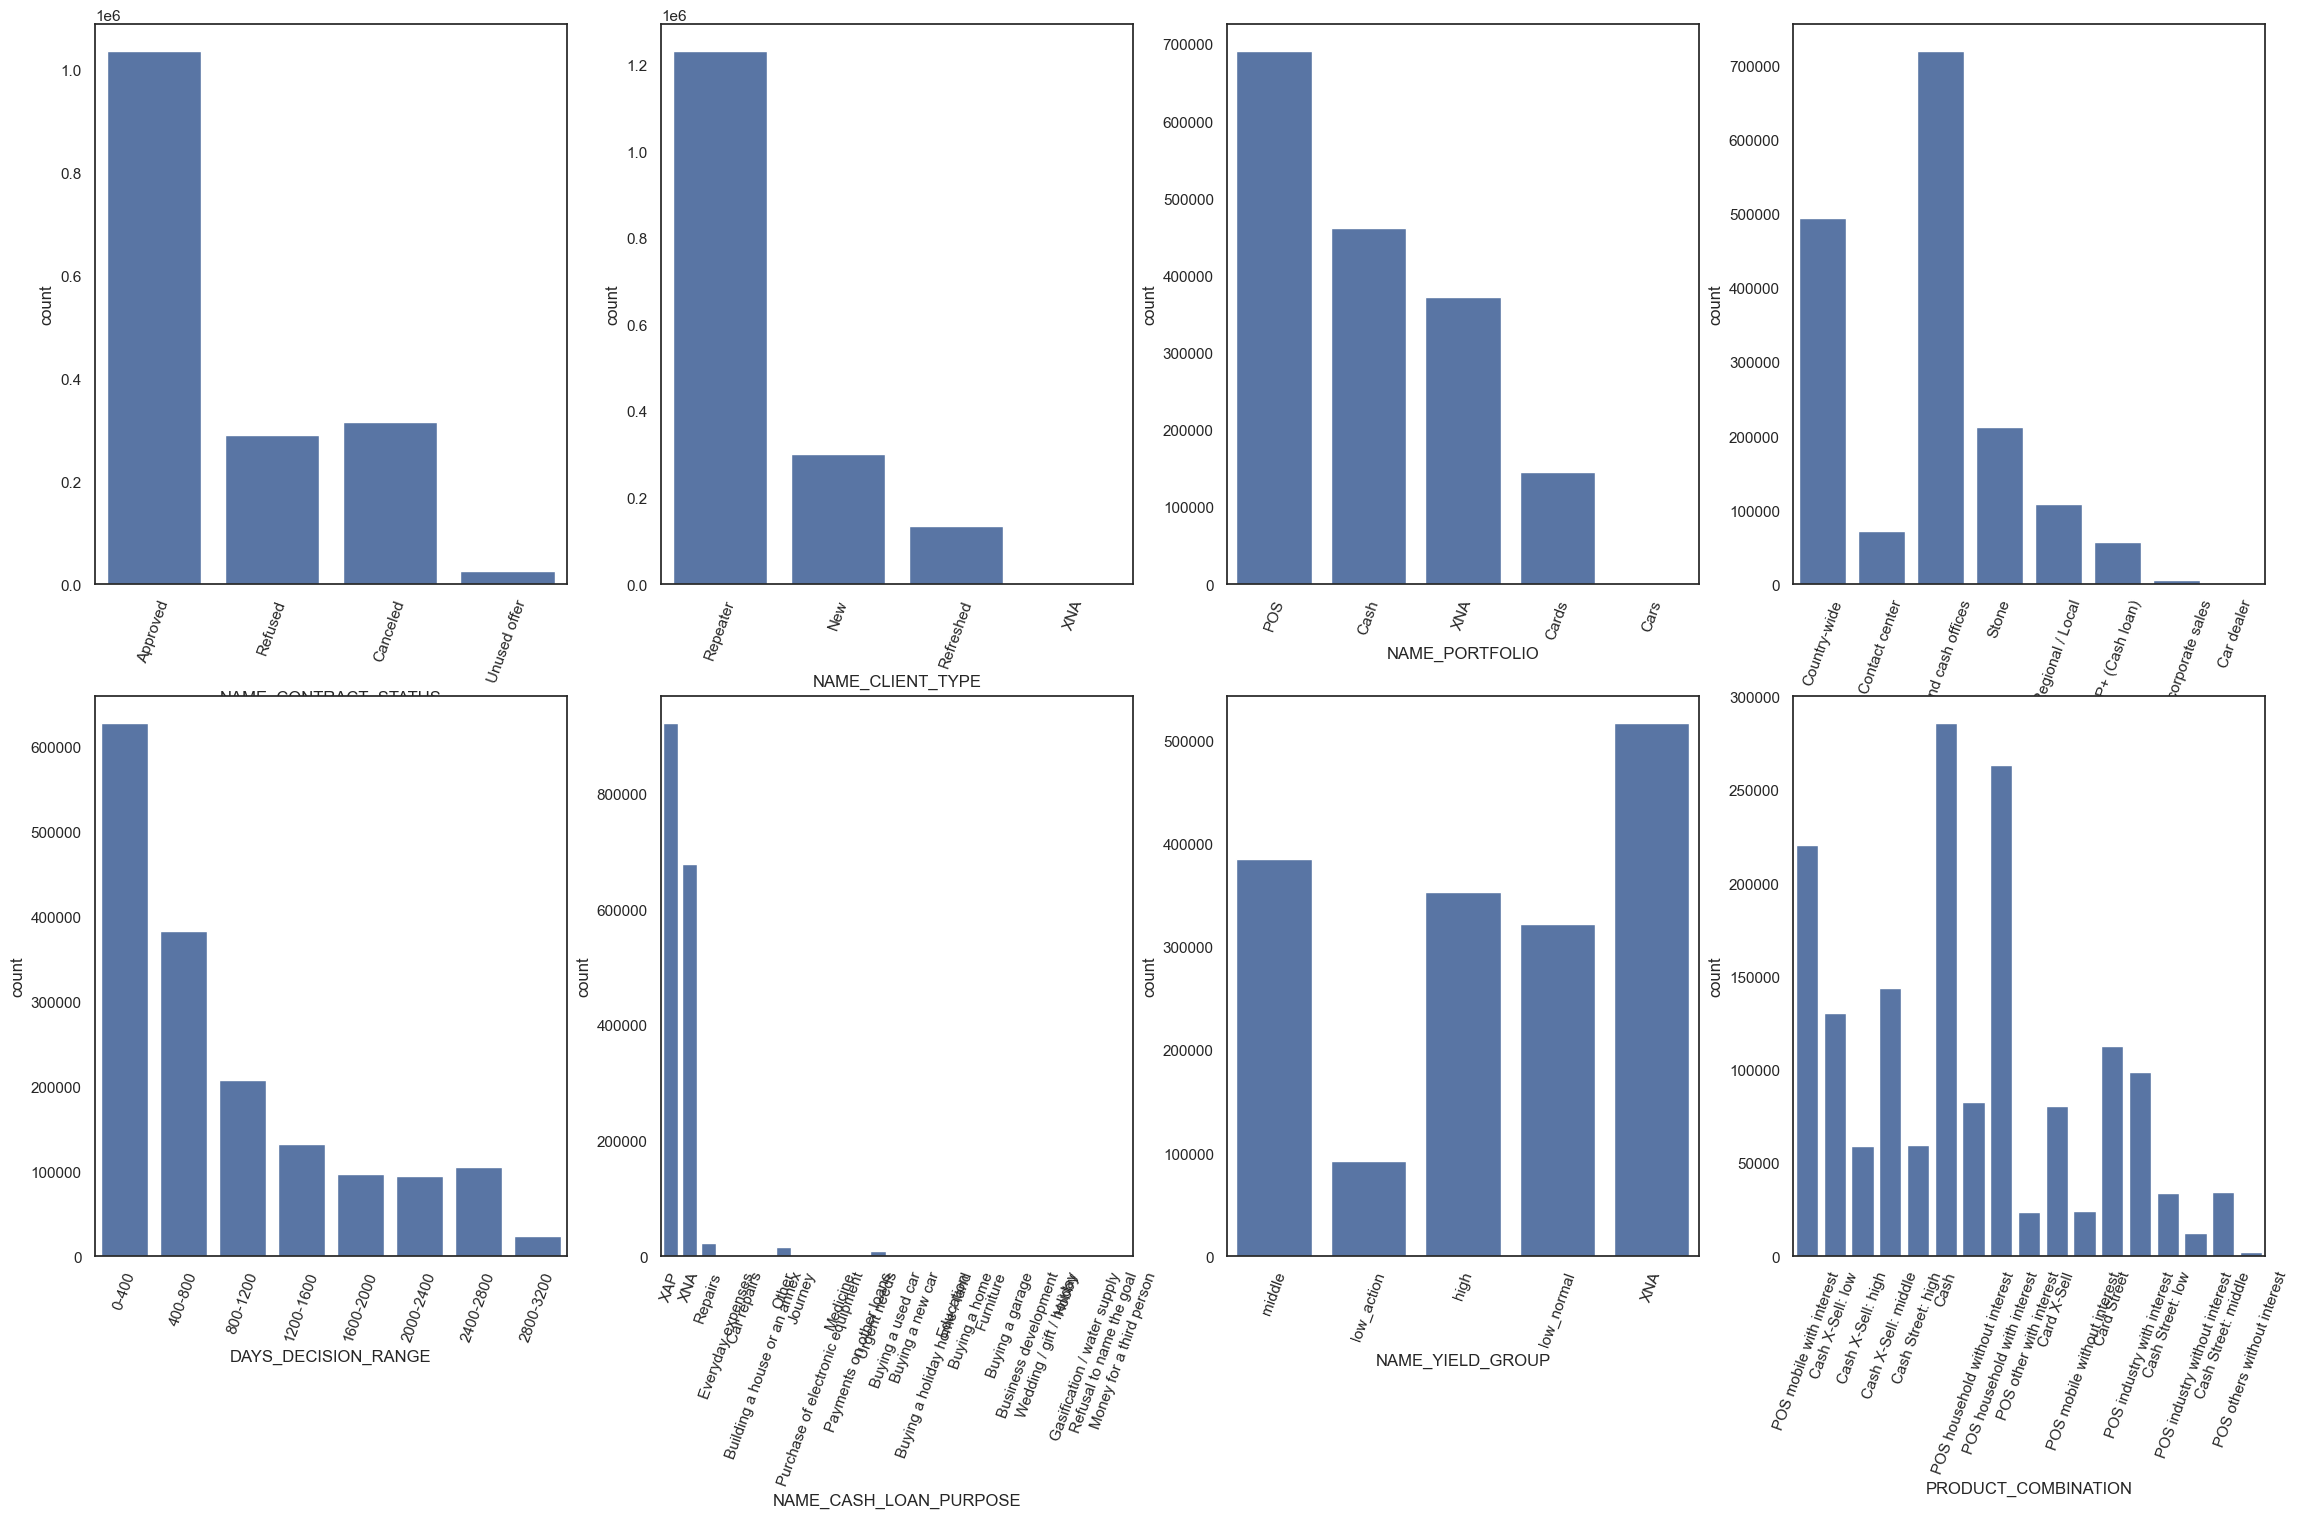

In [64]:
col_list = ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO','CHANNEL_TYPE','DAYS_DECISION_RANGE','NAME_CASH_LOAN_PURPOSE',
            'NAME_YIELD_GROUP','PRODUCT_COMBINATION']
plt.figure(figsize = (28,16))
plotnum = 1
for col in col_list:
  plt.subplot(2,4,plotnum)
  sns.countplot(data= prev_application_data, x= col)
  plt.xticks(rotation = 70)
  plotnum+=1
plt.show()

Combining the Current Application and Previous Application datasets into a single dataset to facilitate comprehensive analysis across both.

In [65]:
final_application = pd.merge(application_data_final,prev_application_data,how='left', on=['SK_ID_CURR'])

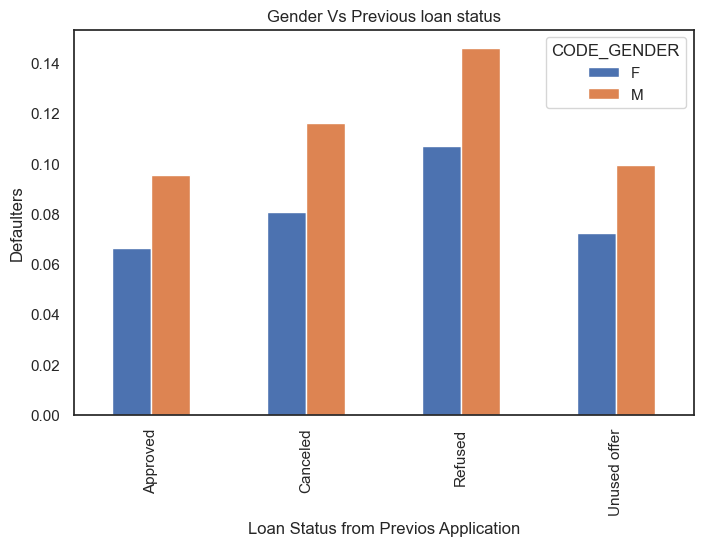

In [66]:
final_application.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Loan Status from Previos Application')
plt.ylabel('Defaulters')
plt.title('Gender Vs Previous loan status')
plt.show()

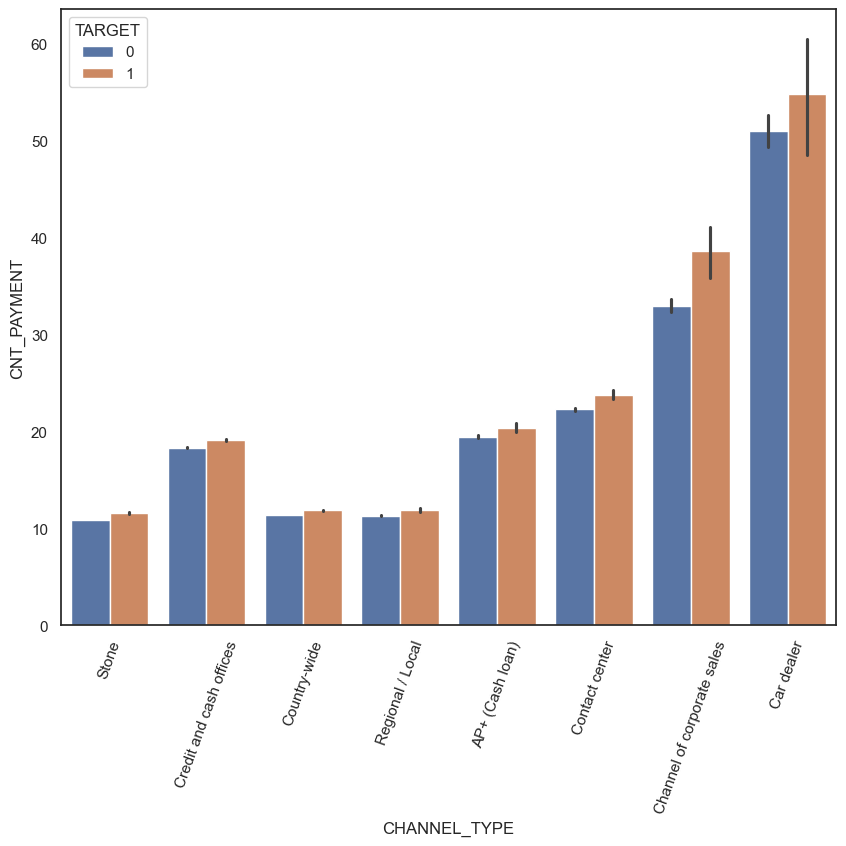

In [67]:
plt.figure(figsize = (10,8))
sns.barplot(data=final_application,x='CHANNEL_TYPE', y='CNT_PAYMENT',hue='TARGET' )
plt.xticks(rotation=70)
plt.show()

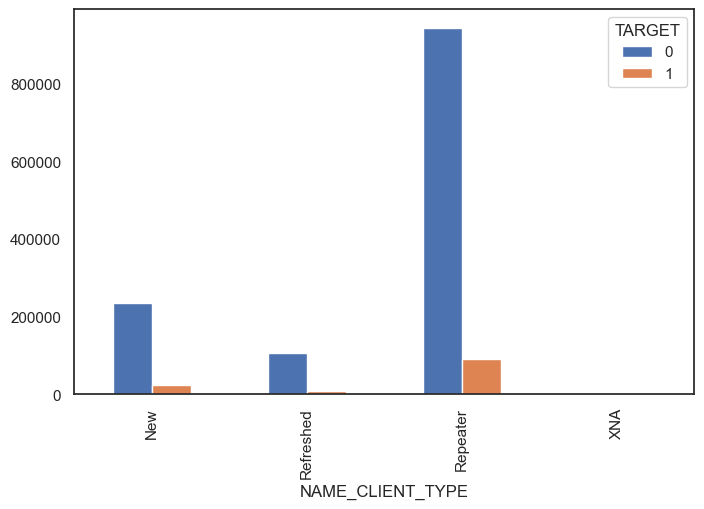

In [68]:
df0 = pd.pivot_table(data=final_application,values='AMT_ANNUITY_x', index= 'NAME_CLIENT_TYPE',columns='TARGET', aggfunc='count').plot.bar(figsize=(8,5))
plt.show()

In [69]:
d = final_application.groupby("NAME_FAMILY_STATUS")["TARGET"]
df1 = pd.concat([d.value_counts(),round(d.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1.sort_values(by=['TARGET','Percentage'],ascending=False).head(5)

Counts  Percentage
NAME_FAMILY_STATUS   TARGET                    
Civil marriage       1        14834       10.29
Single / not married 1        19102       10.09
Separated            1         7819        8.48
Married              1        76371        8.31
Widow                1         4919        5.99

In [70]:
d = final_application.groupby("NAME_CASH_LOAN_PURPOSE")["TARGET"]
df1 = pd.concat([d.value_counts(),round(d.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1.sort_values(by=['TARGET','Percentage'],ascending=False).head(10)

Counts  Percentage
NAME_CASH_LOAN_PURPOSE       TARGET                    
Refusal to name the goal     1            3       23.08
Hobby                        1            9       20.00
Car repairs                  1          127       18.38
Gasification / water supply  1           45       17.93
Money for a third person     1            4       17.39
Payments on other loans      1          252       16.07
Urgent needs                 1         1082       14.98
Building a house or an annex 1          324       13.88
Medicine                     1          250       13.40
Repairs                      1         2613       13.02

In [71]:
d = final_application.groupby("OCCUPATION_TYPE")["TARGET"]
df1 = pd.concat([d.value_counts(),round(d.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1.sort_values(by=['TARGET','Percentage'],ascending=False).head(10)

Counts  Percentage
OCCUPATION_TYPE      TARGET                    
Low-skill Laborers   1         2171       15.08
Security staff       1         4811       10.48
Drivers              1        13094       10.35
Waiters/barmen staff 1          919        9.87
Cooking staff        1         4026        9.79
Laborers             1        36524        9.75
Sales staff          1        20080        9.02
Realty agents        1          458        8.71
Cleaning staff       1         2946        8.51
Secretaries          1          708        8.27

In [72]:
d = final_application.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([d.value_counts(),round(d.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1.sort_values(by=['TARGET','Percentage'],ascending=False).head(5)

Counts  Percentage
NAME_CONTRACT_STATUS TARGET                    
Refused              1        29347       11.99
Canceled             1        23773        9.18
Unused offer         1         1874        8.25
Approved             1        67074        7.59
                     0       816886       92.41

### Insights:

1. Applicants acquired through **Car Dealers** and **Corporate Sales** have a higher default rate.  
2. Individuals who are **Civilly Married** or **Single** tend to default more frequently.  
3. Applicants who do not disclose the **purpose of the loan** have the highest default rate.  
4. **Low-Skill Laborers** exhibit a significantly higher default rate.  
5. Applicants whose previous loan applications were **Refused** or **Canceled** show the highest likelihood of default.

### Characteristics of Applicants Likely to Repay:

1. **Education**: Applicants with an **Academic Degree** have a lower default rate.  
2. **Income Type**: **Students** and **Businessmen** rarely default.  
3. **Organization Type**: Clients associated with **Trade Type 4 and 5** or **Industry Type 8** have default rates below 3%.  
4. **Employment Duration**: Applicants with **40+ years of experience** are less likely to default.  
5. **Loan Purpose**: Loans taken for purposes like **Buying a New Car** or **Education** are repaid more often.

### Characteristics of Applicants Likely to Default:

1. **Gender**: **Male applicants** have a higher default rate compared to females.  
2. **Family Status**: Individuals who are **Civilly Married** or **Single** default more often.  
3. **Education**: Applicants with **Lower Secondary** or **Secondary Education** have higher default rates.  
4. **Region Rating**: Residents of **Rating 3 Regions** have the highest default rates.  
5. **Occupation Type**: **Low-Skill Laborers**, **Drivers**, and **Security Staff** have the highest likelihood of default.  
6. **Organization Type**: Applicants associated with **Business Type 3** or those who are **Self-Employed** have relatively high default rates.  
7. **Employment Duration**: Applicants with **less than 5 years of employment** tend to default more often.  
8. **Income-Credit Ratio**: A **higher Income-Credit Ratio** is associated with a lower default rate.